Advanced Housing Prices --- Prediction using EDA
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)  #to display all the columns

In [2]:
data=pd.read_csv('train_data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
#finding the null values in all the columns
null_val=[val for val in data.columns if data[val].isnull().sum()>1] 
#print(null_val)
for val in null_val:
    print('{} column has {} % of null values'.format(val,np.round(data[val].isnull().mean(), 4)))

LotFrontage column has 0.1774 % of null values
Alley column has 0.9377 % of null values
MasVnrType column has 0.5973 % of null values
MasVnrArea column has 0.0055 % of null values
BsmtQual column has 0.0253 % of null values
BsmtCond column has 0.0253 % of null values
BsmtExposure column has 0.026 % of null values
BsmtFinType1 column has 0.0253 % of null values
BsmtFinType2 column has 0.026 % of null values
FireplaceQu column has 0.4726 % of null values
GarageType column has 0.0555 % of null values
GarageYrBlt column has 0.0555 % of null values
GarageFinish column has 0.0555 % of null values
GarageQual column has 0.0555 % of null values
GarageCond column has 0.0555 % of null values
PoolQC column has 0.9952 % of null values
Fence column has 0.8075 % of null values
MiscFeature column has 0.963 % of null values


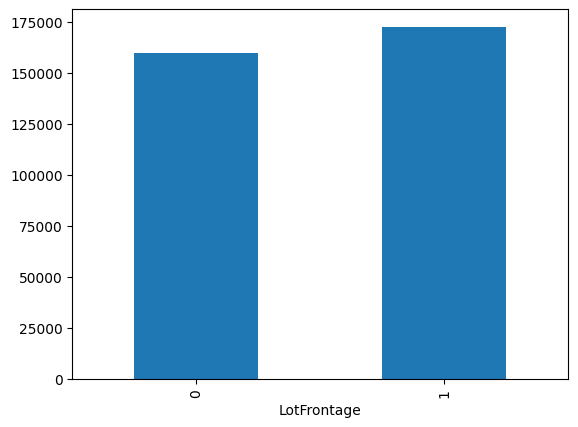

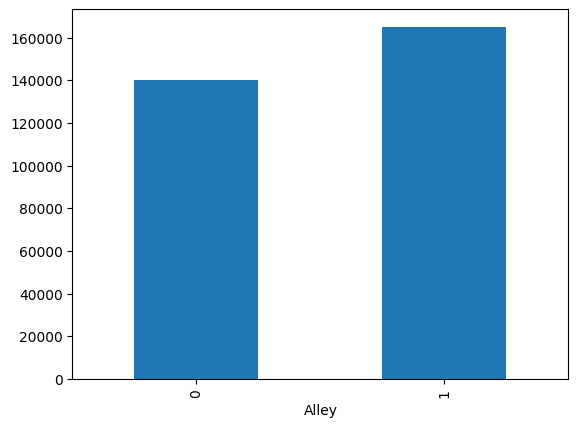

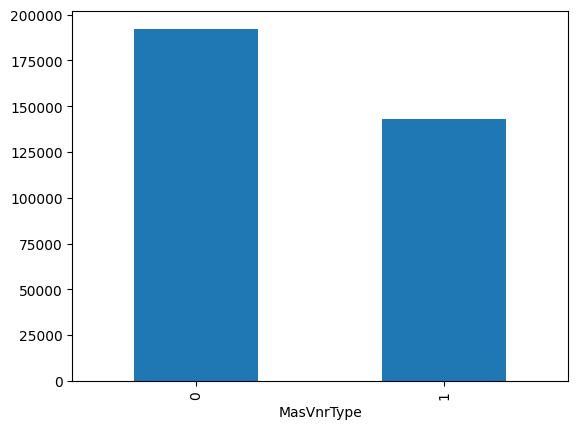

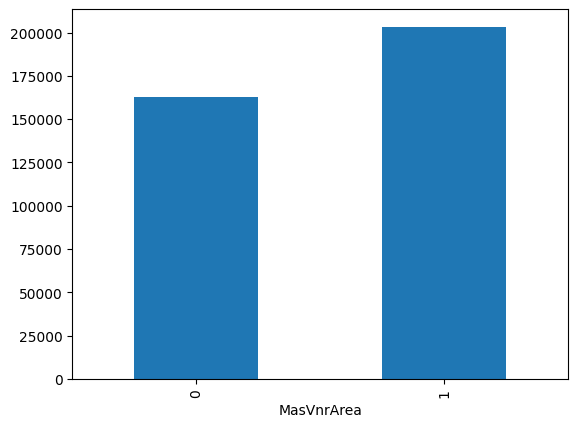

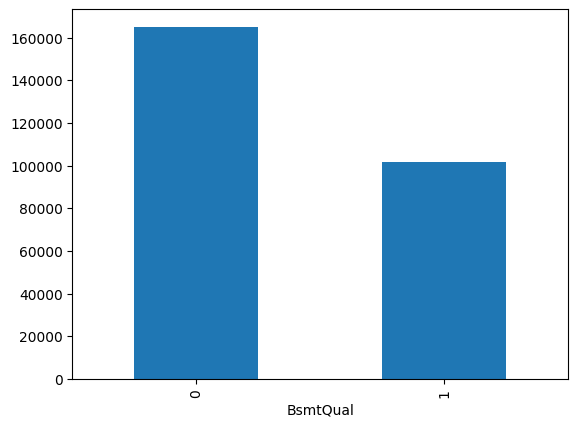

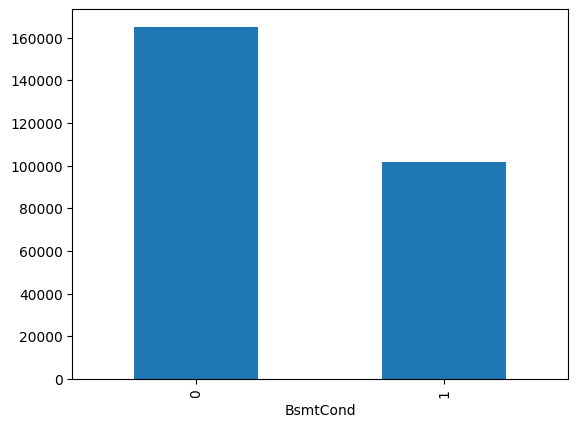

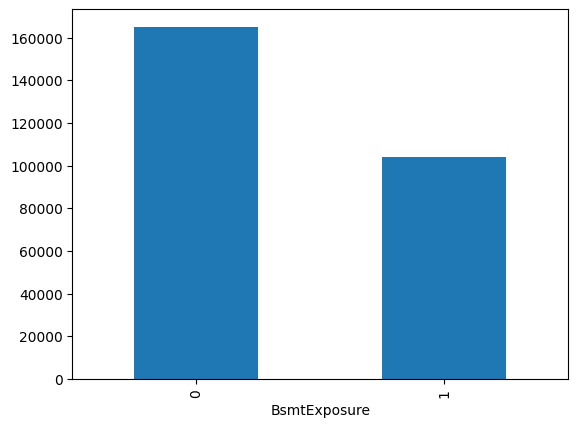

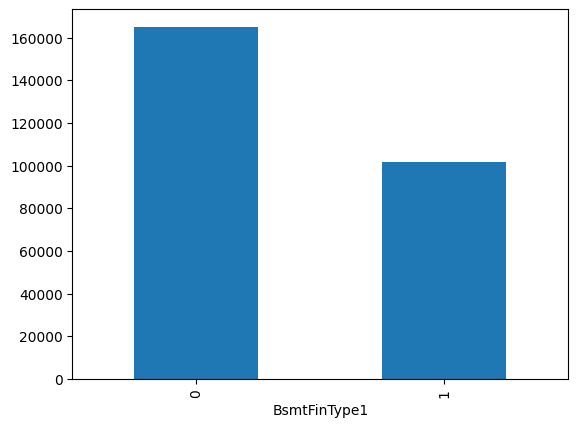

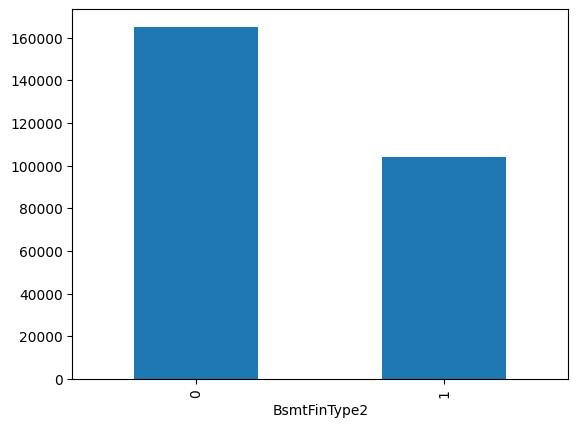

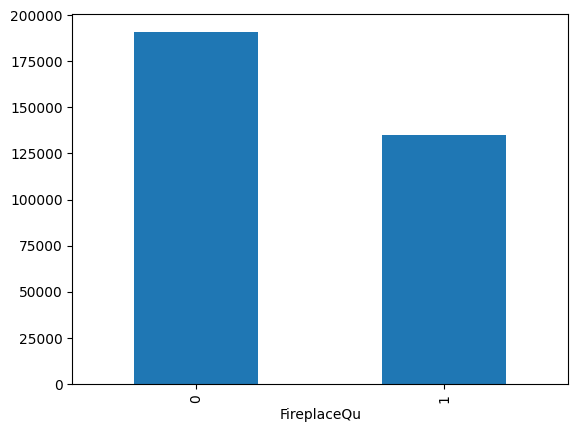

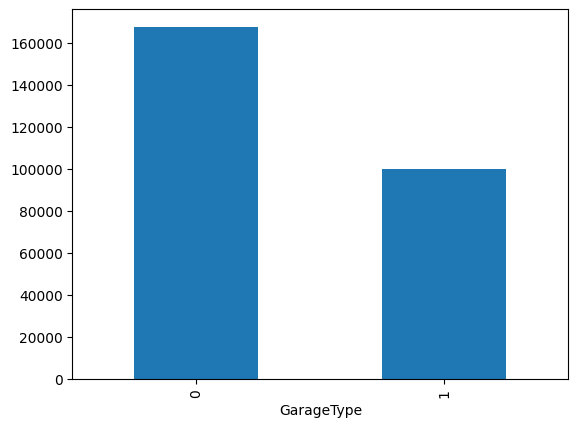

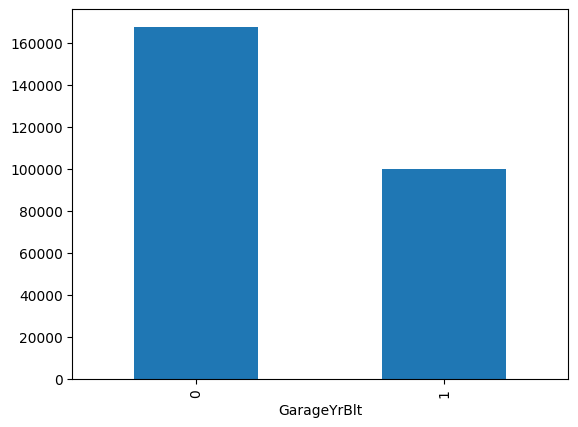

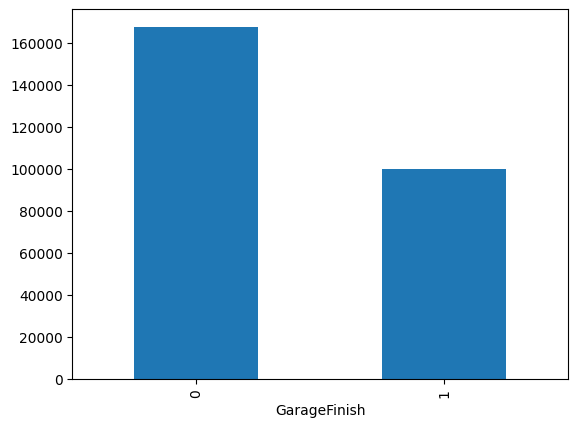

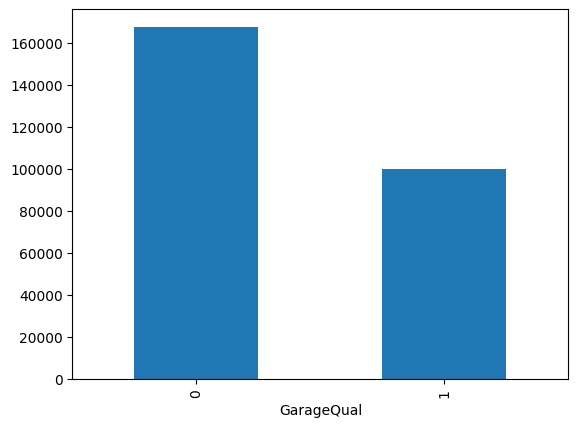

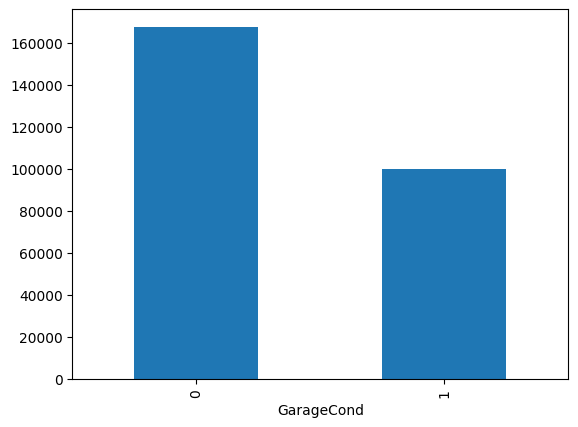

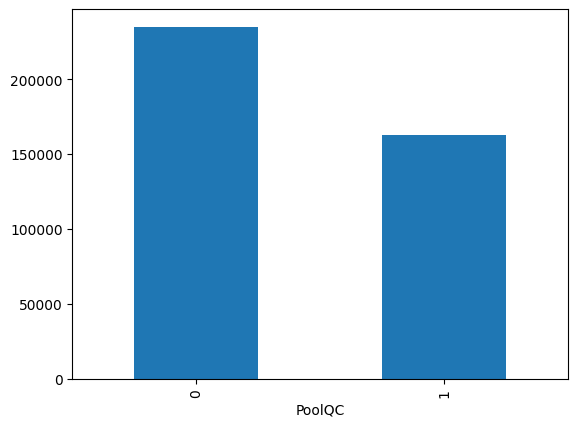

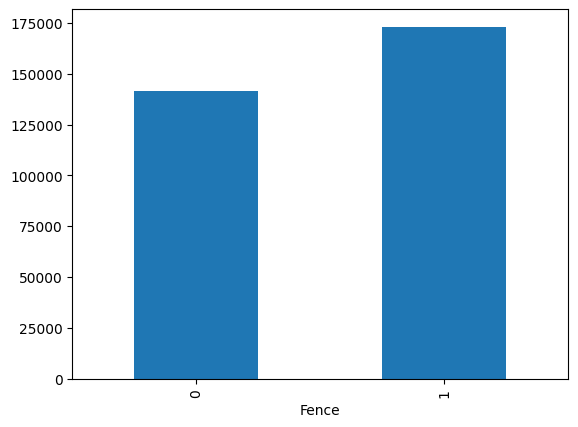

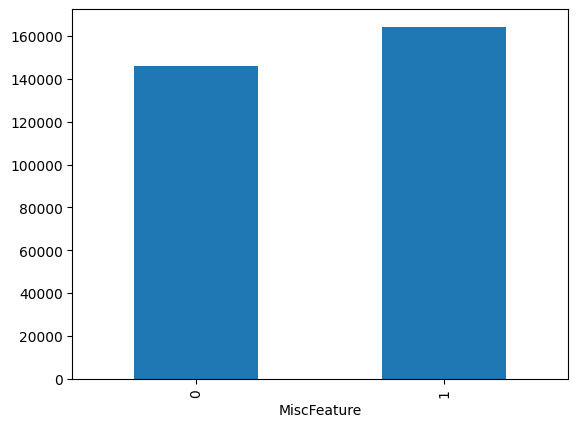

In [4]:
for val in null_val:
    temp_dataset=data.copy()
    temp_dataset[val] = np.where(temp_dataset[val].isnull(), 1, 0)
    temp_dataset.groupby(val)['SalePrice'].median().plot.bar()
    plt.show()

In [5]:
#calculating which are the numerical values in the dataset
num_val=[val for val in data.columns if data[val].dtypes!='O' and val not in 'Id']
print(num_val)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


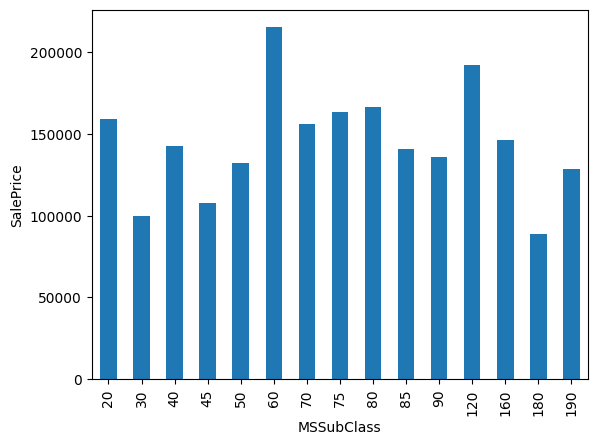

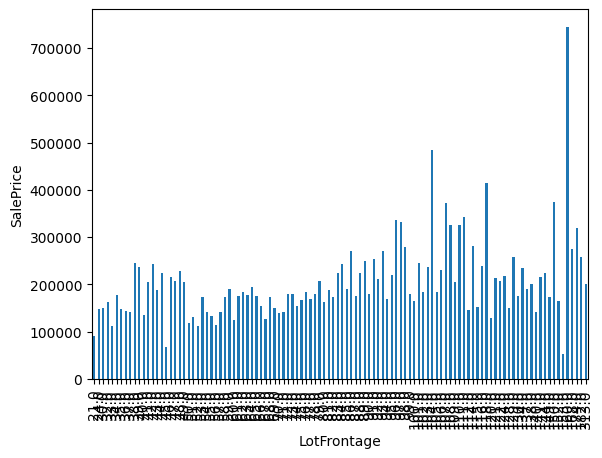

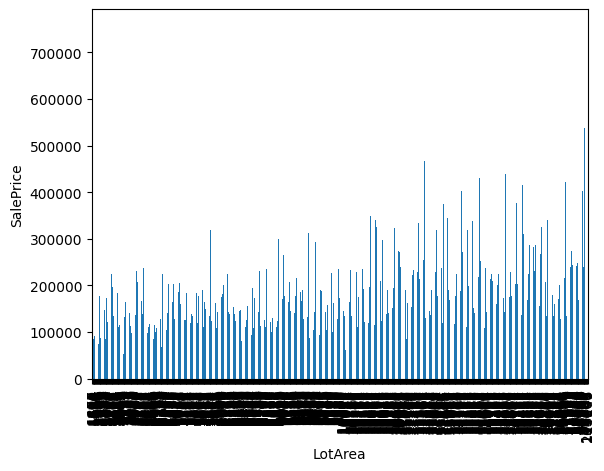

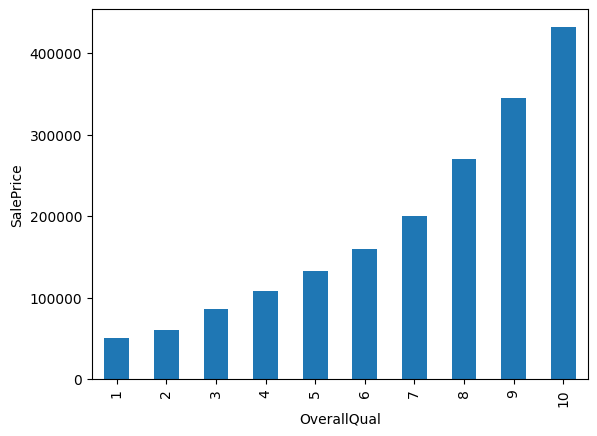

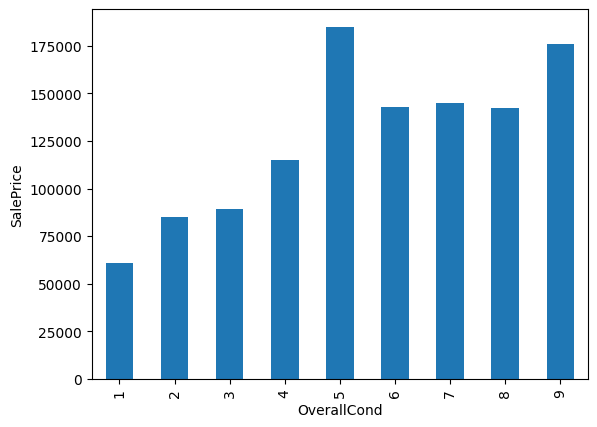

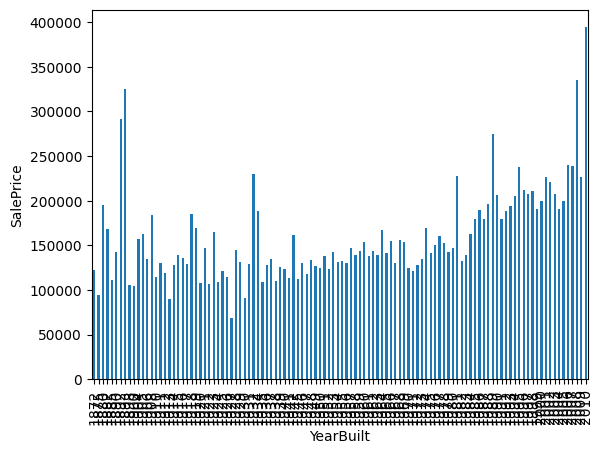

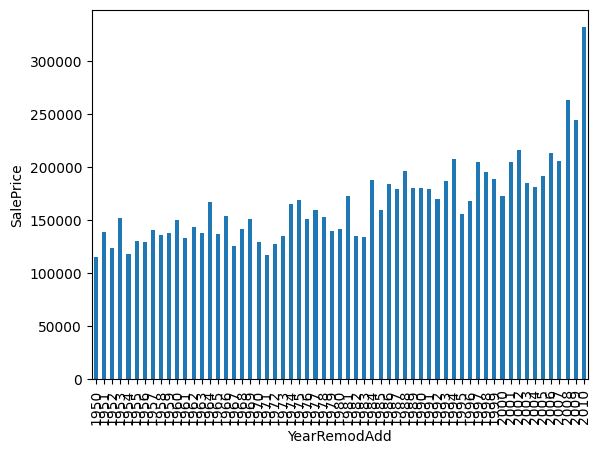

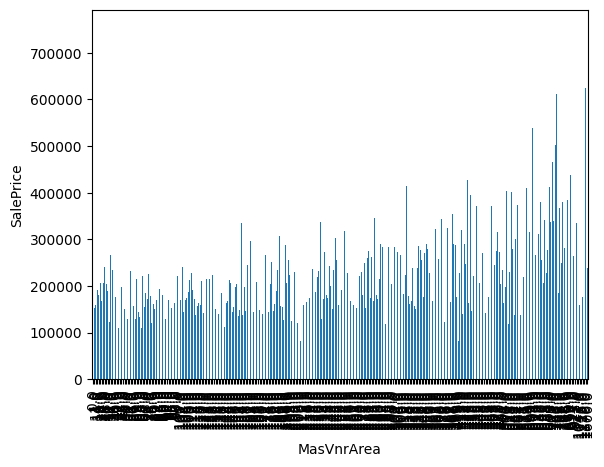

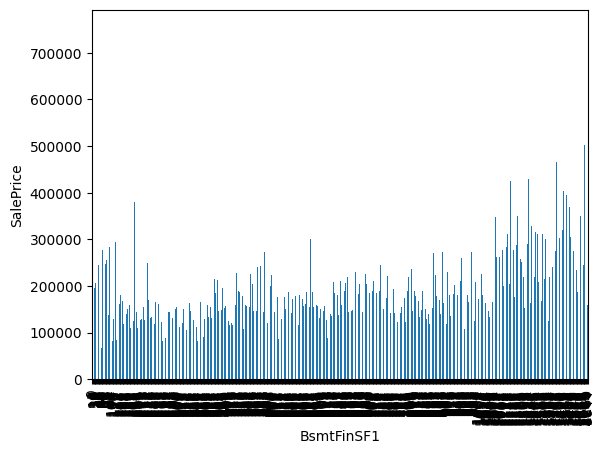

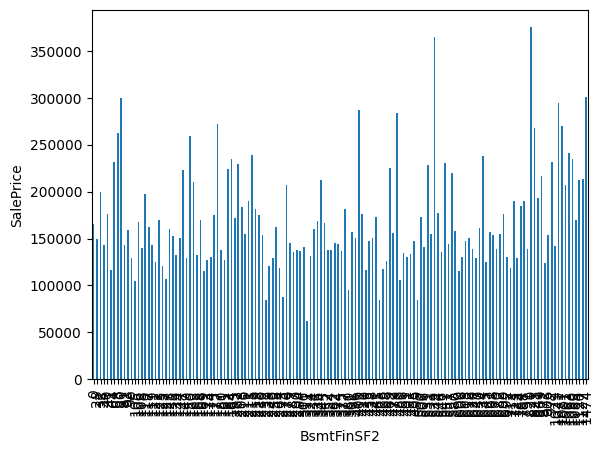

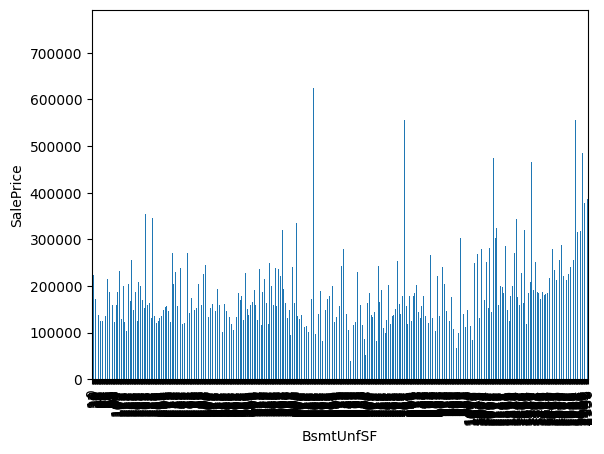

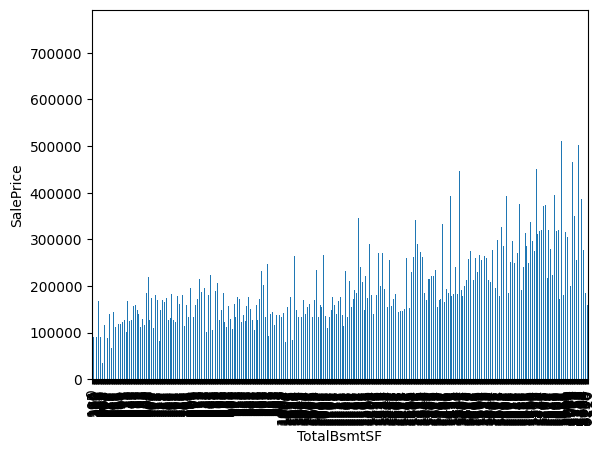

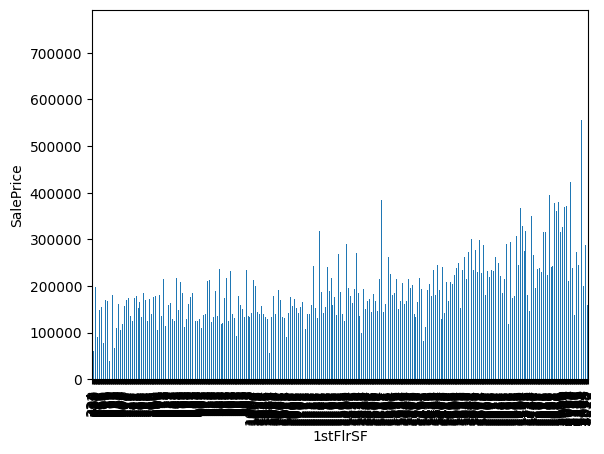

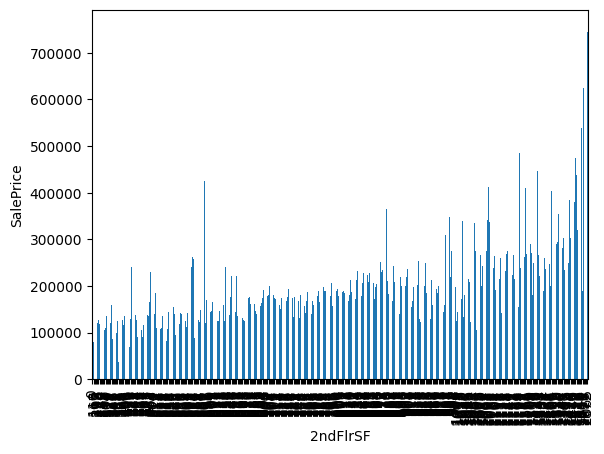

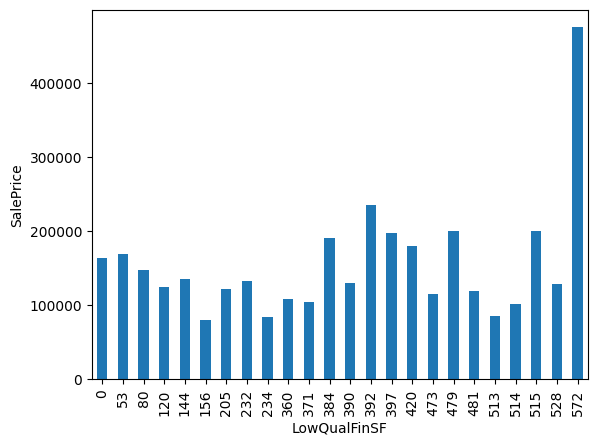

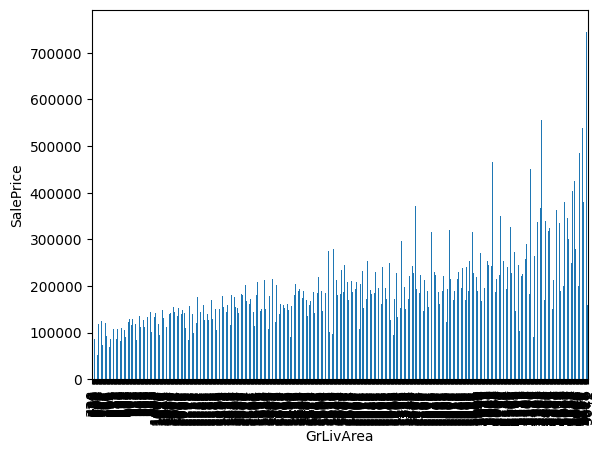

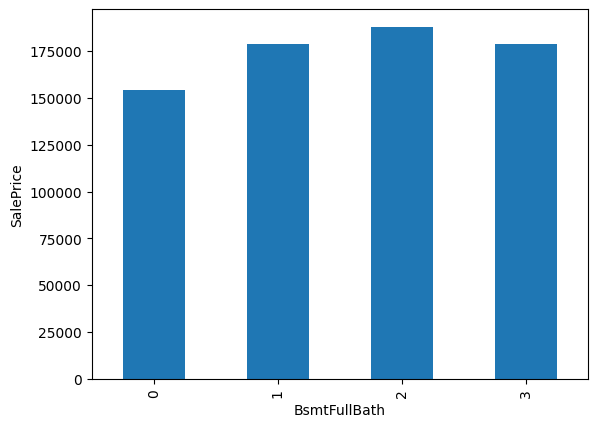

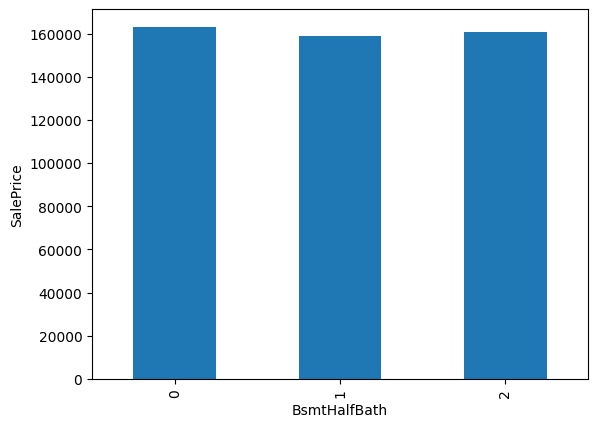

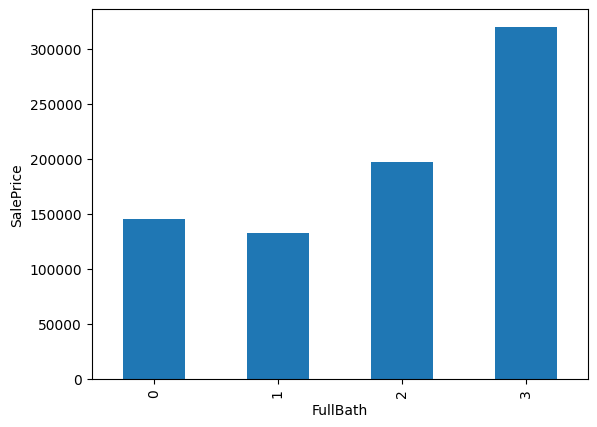

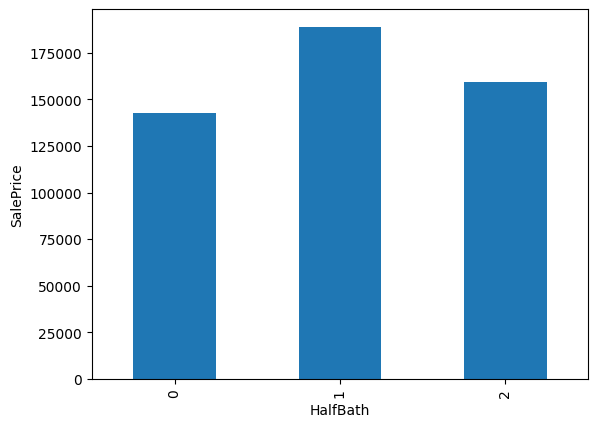

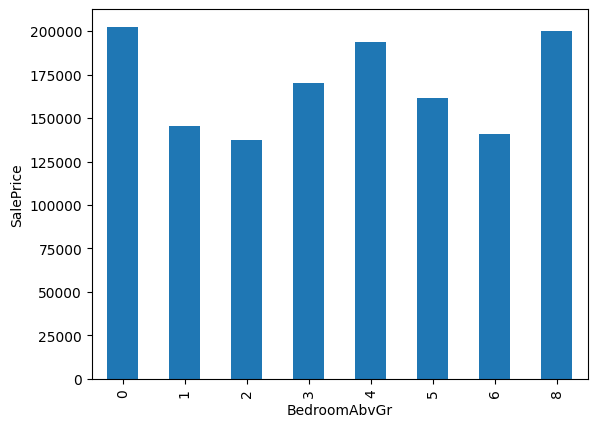

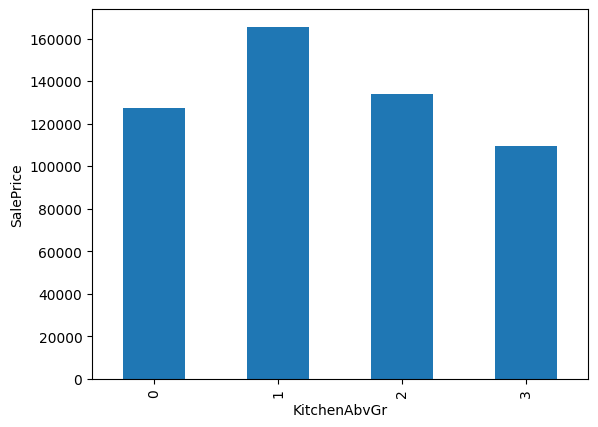

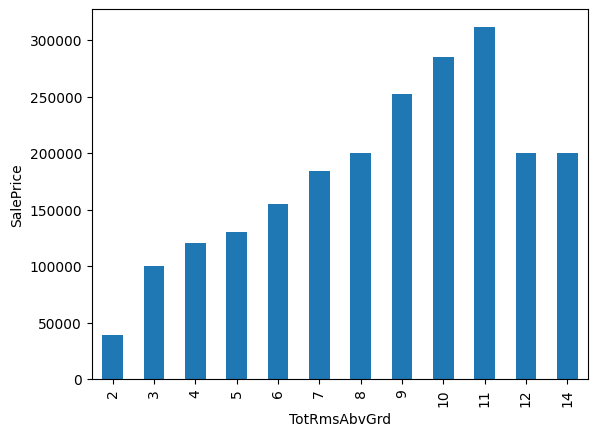

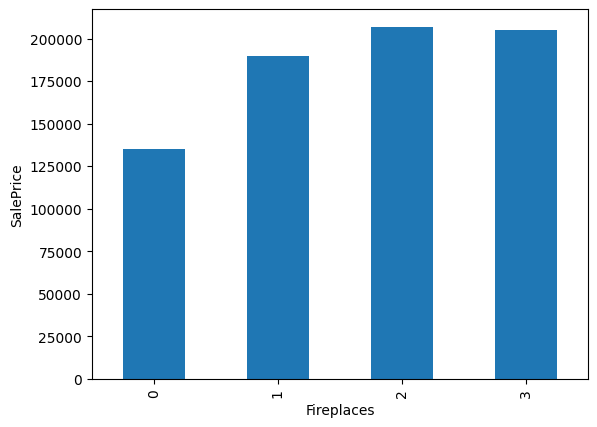

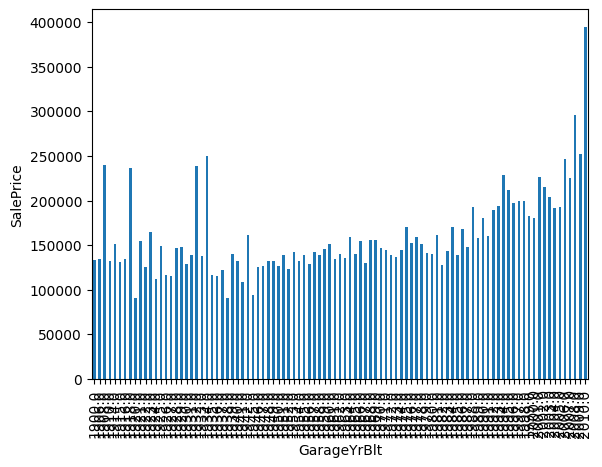

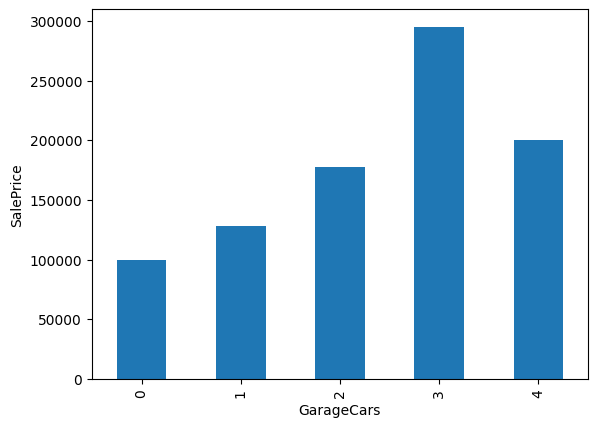

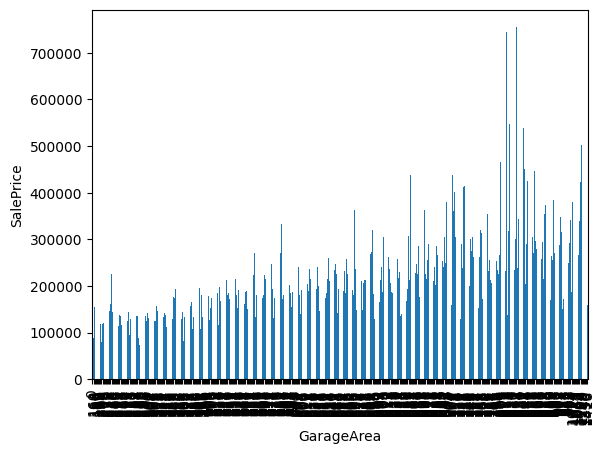

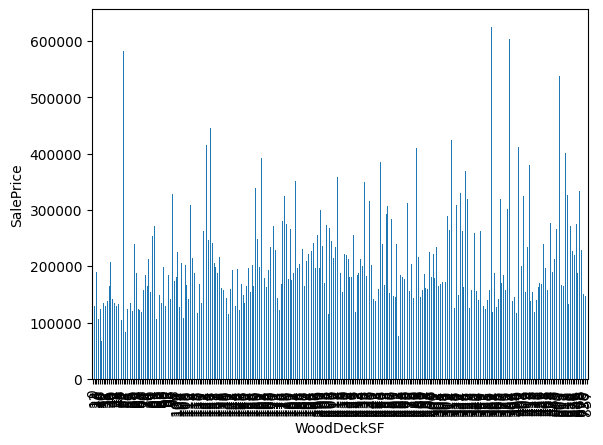

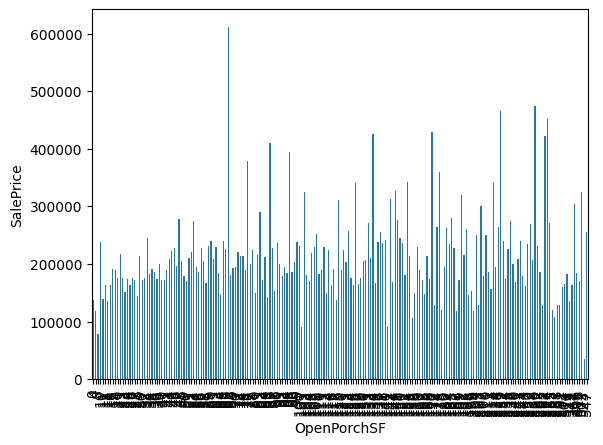

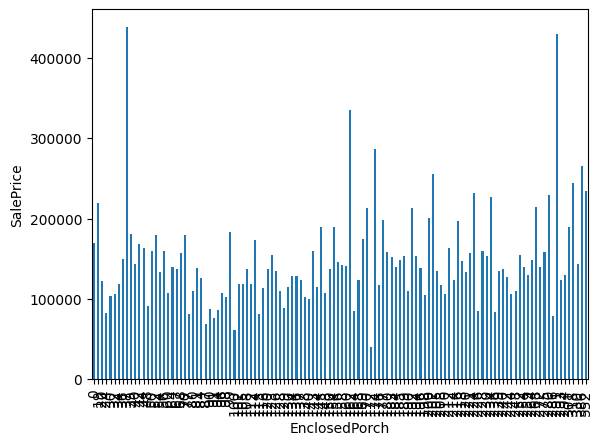

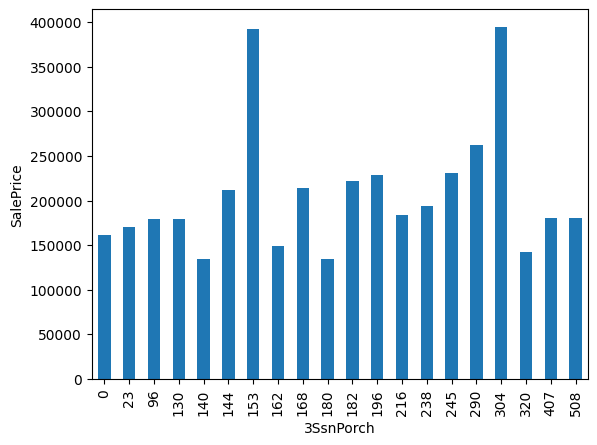

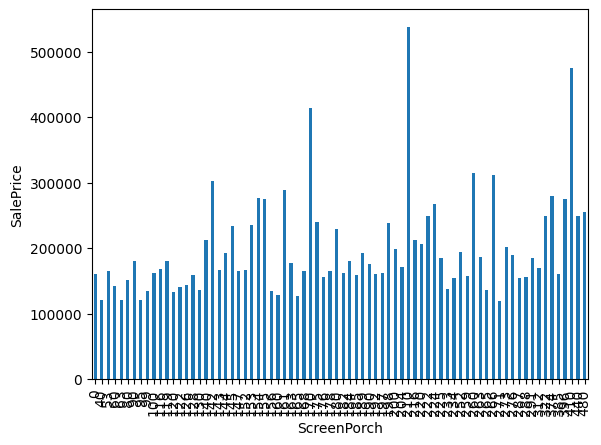

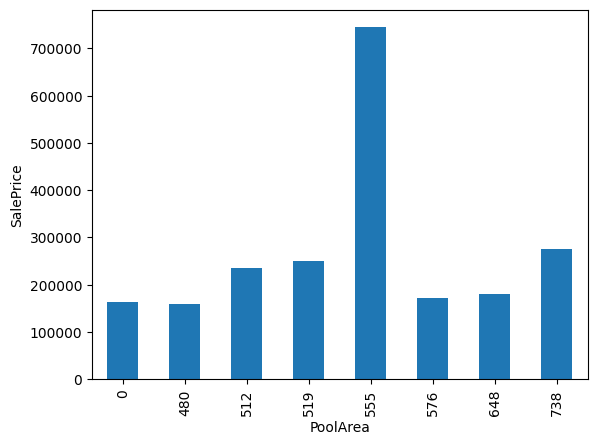

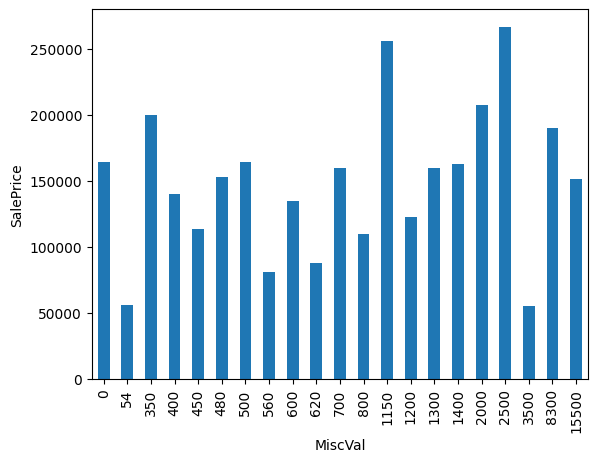

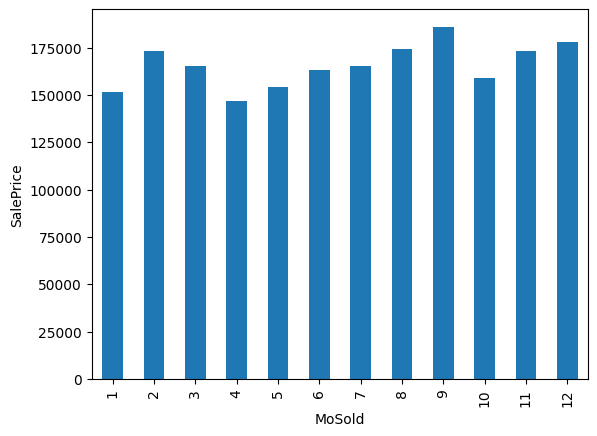

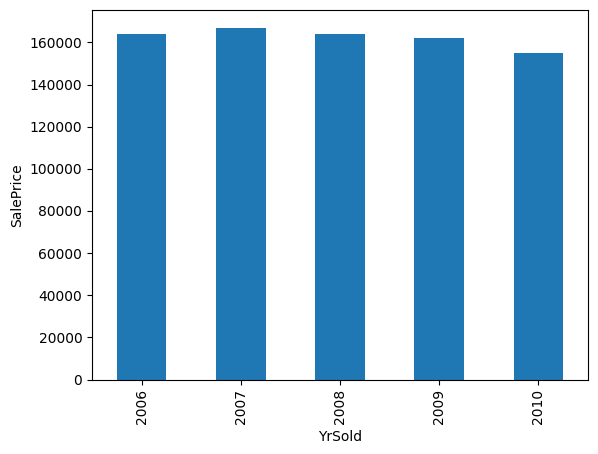

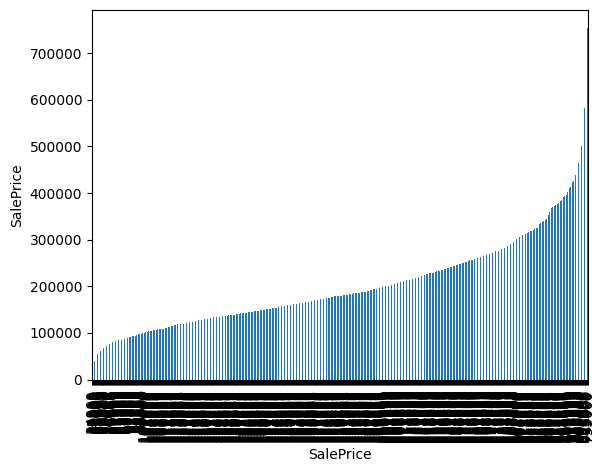

In [6]:
for val in num_val:
    data.groupby(val)['SalePrice'].median().plot.bar()
    plt.xlabel(val)
    plt.ylabel('SalePrice')
    plt.show()

In [7]:
#calculating the % of null values in numerical values
num_null_val=[val for val in data.columns if data[val].dtypes!='O' and val not in 'Id' and data[val].isnull().sum()>1]
for val in num_null_val:
    print('{} has {}% null values'.format(val,np.round(data[val].isnull().mean(),4)))

LotFrontage has 0.1774% null values
MasVnrArea has 0.0055% null values
GarageYrBlt has 0.0555% null values


In [8]:
#finding which are the catagorical values
cat_val=[val for val in data.columns if data[val].dtypes=='O']
print(cat_val)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


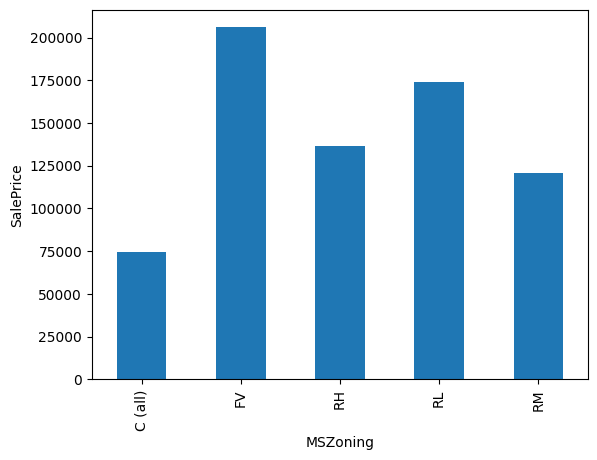

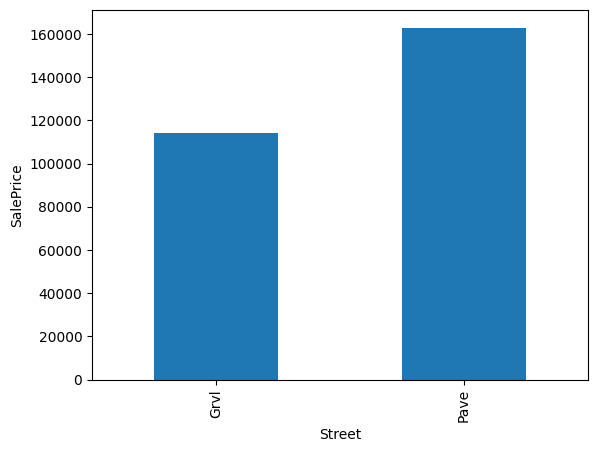

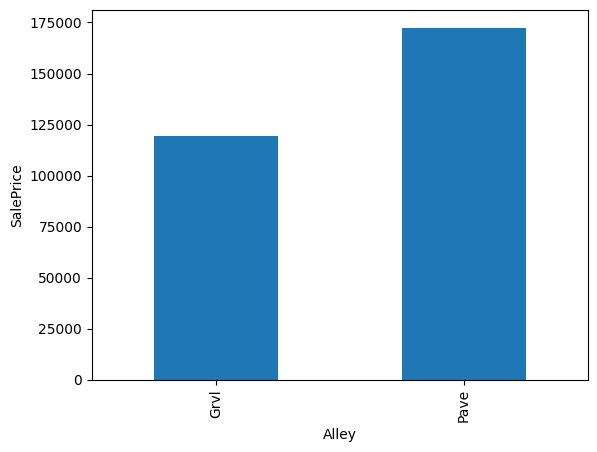

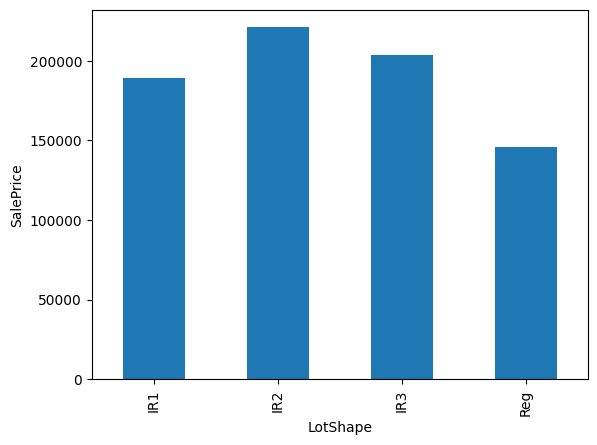

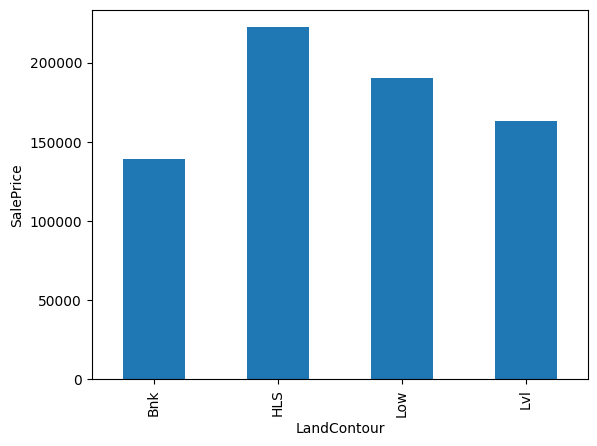

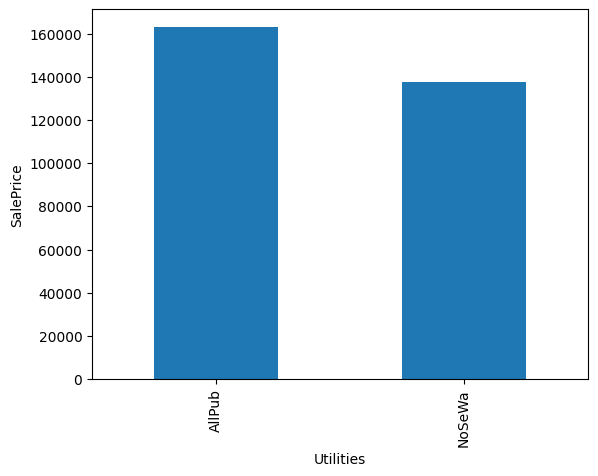

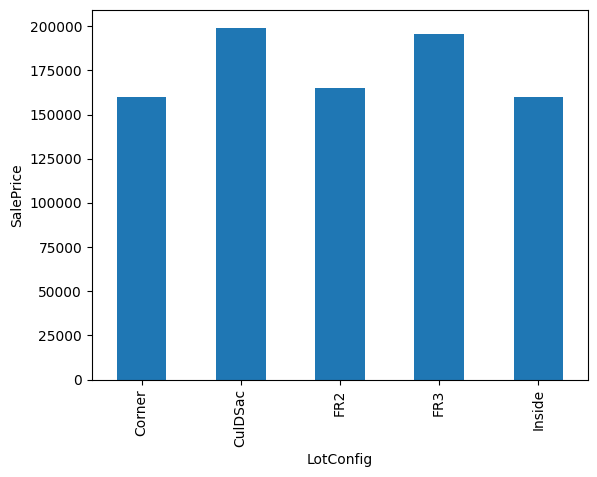

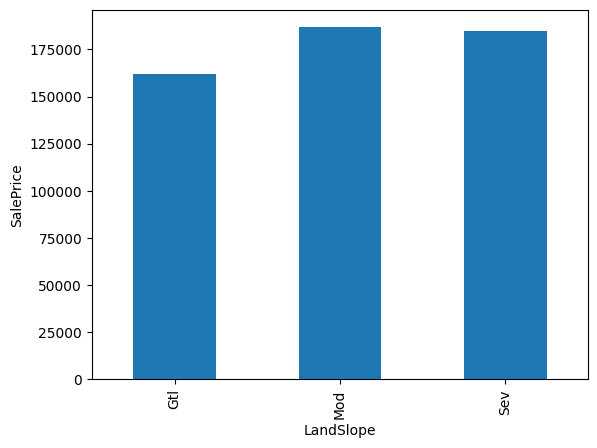

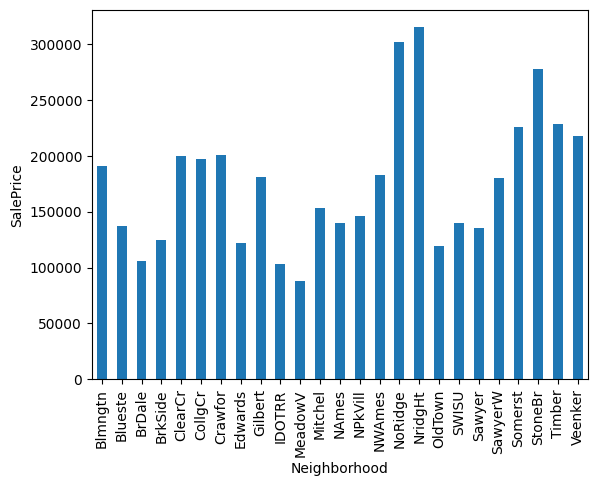

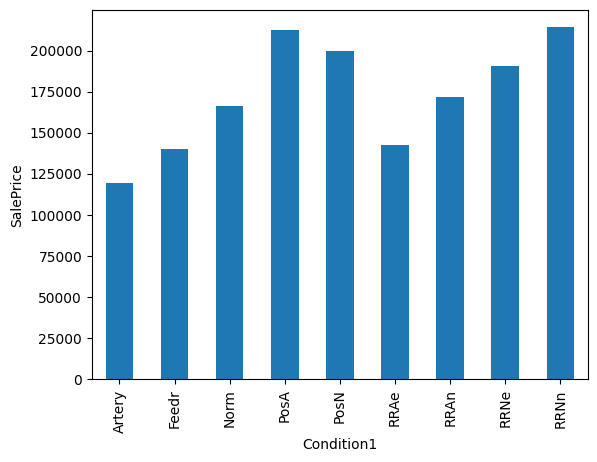

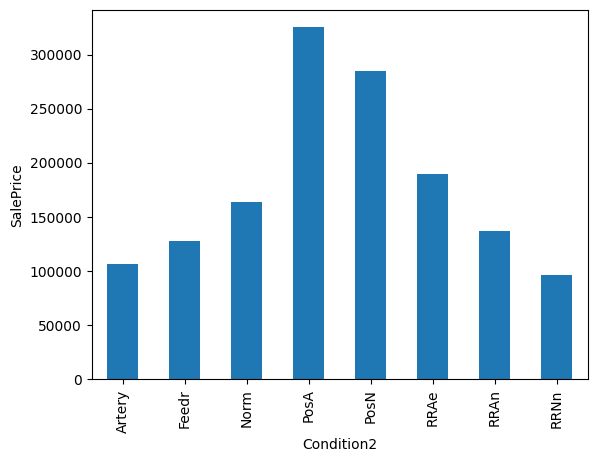

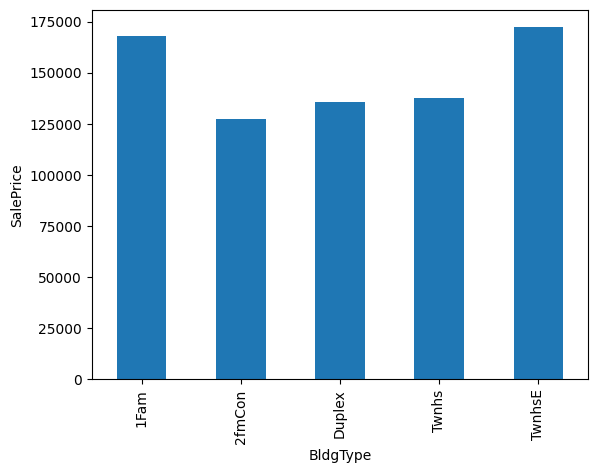

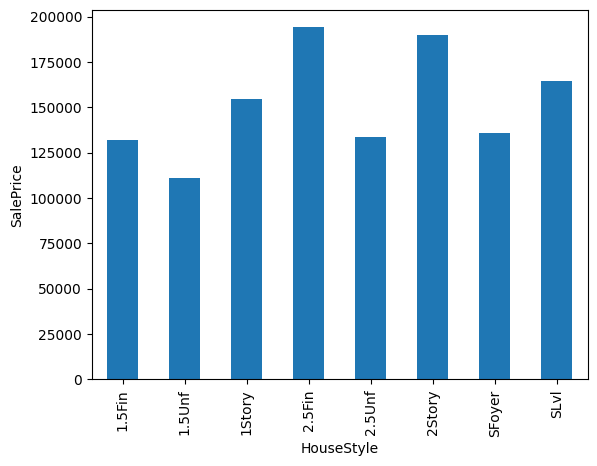

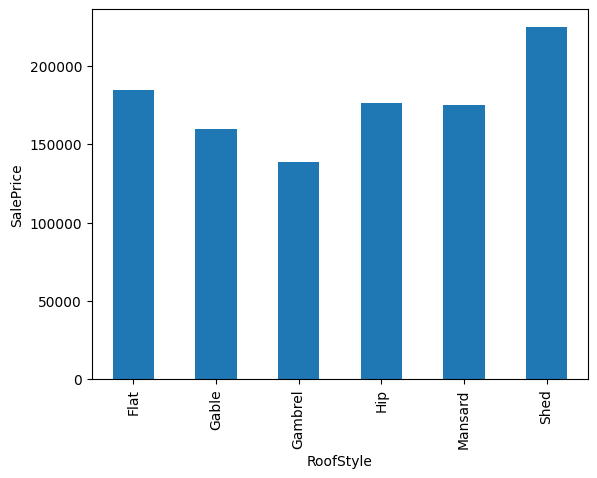

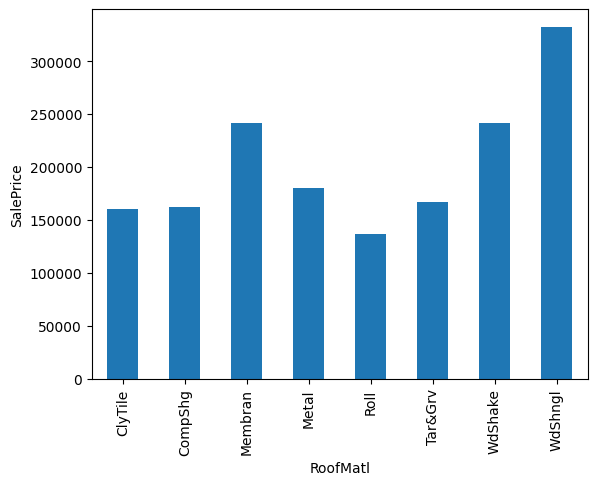

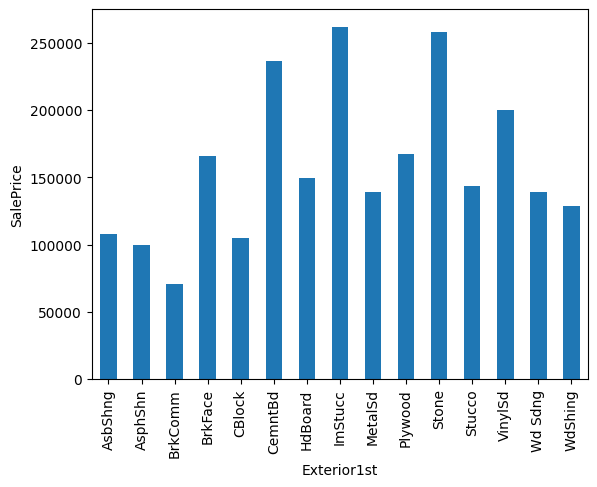

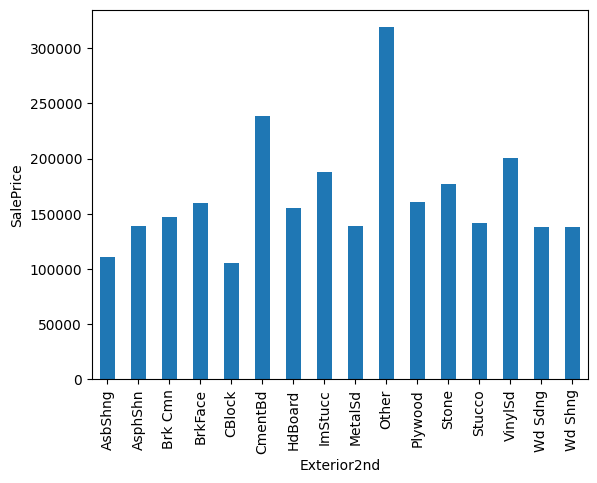

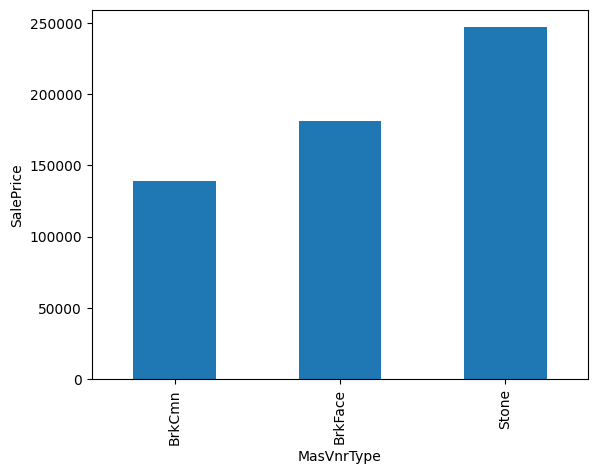

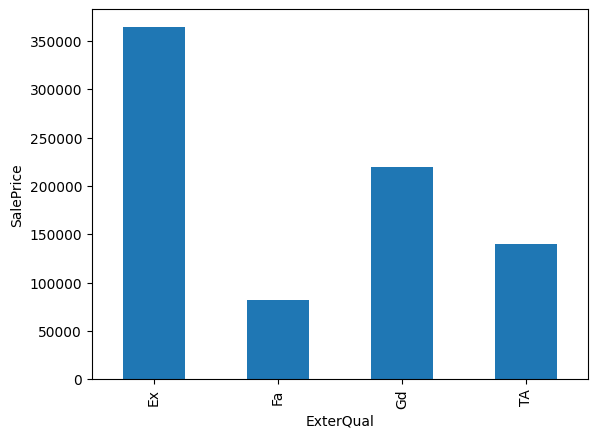

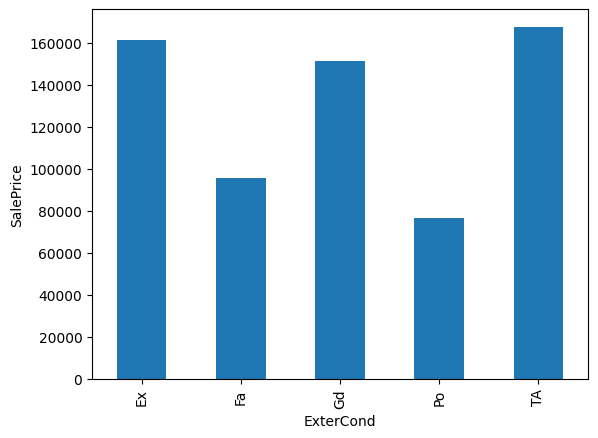

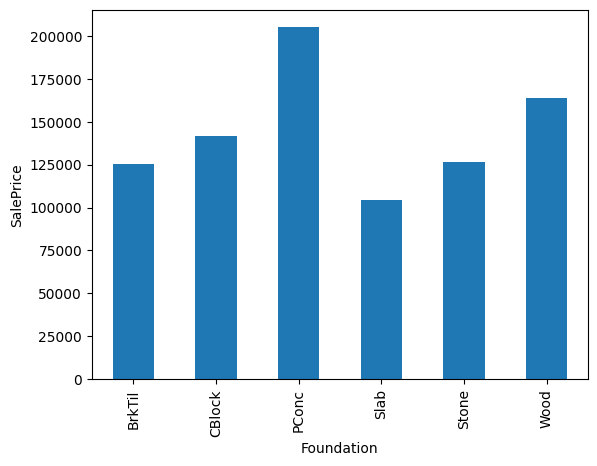

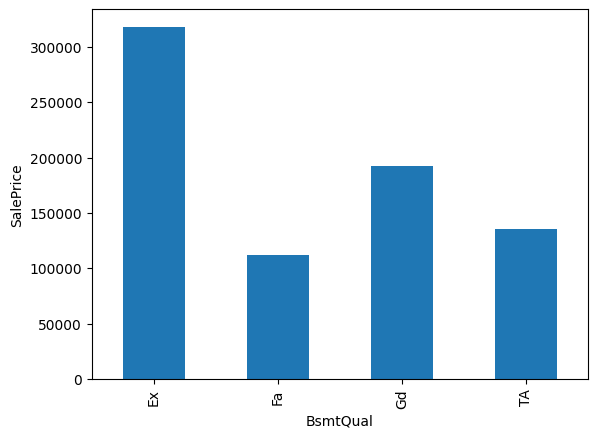

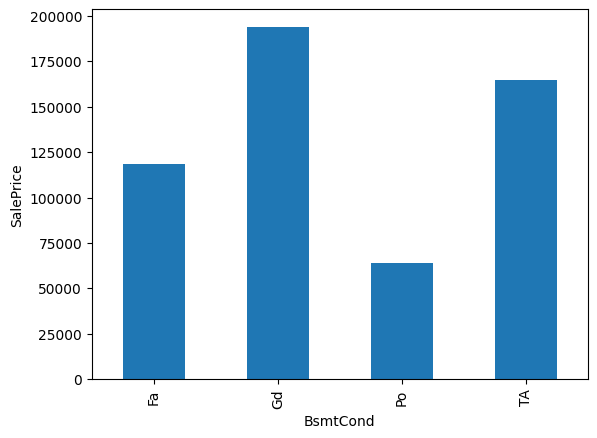

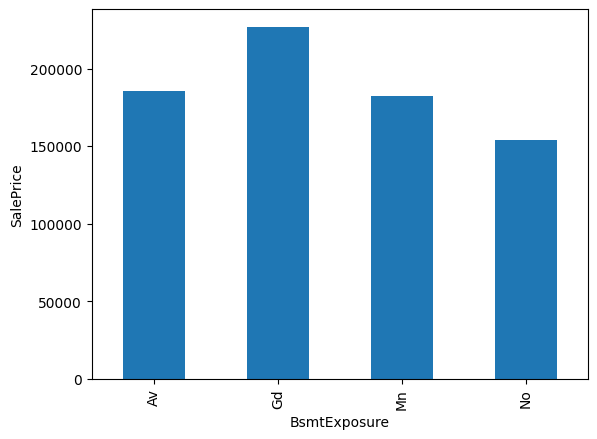

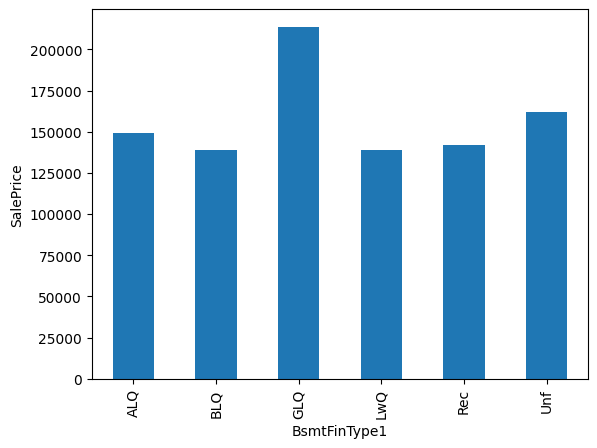

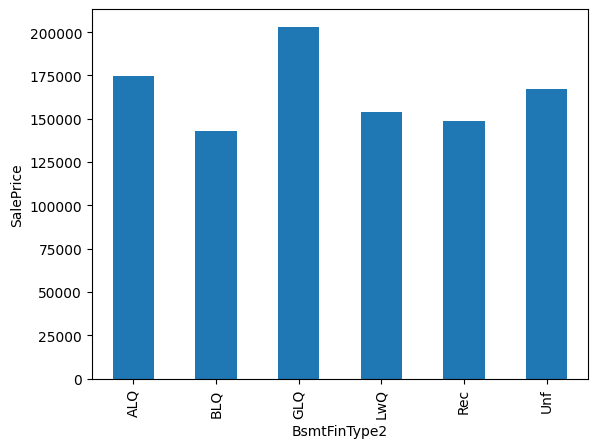

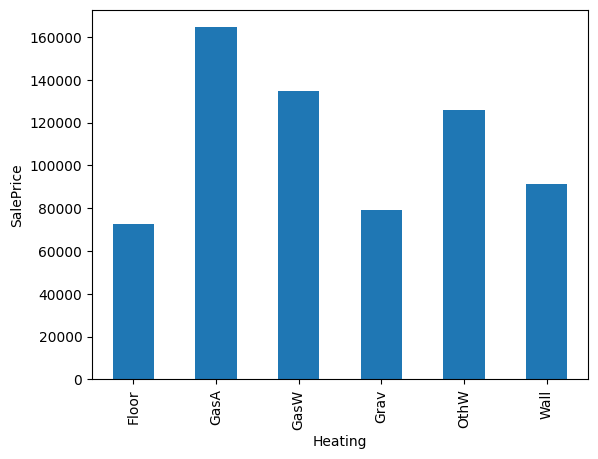

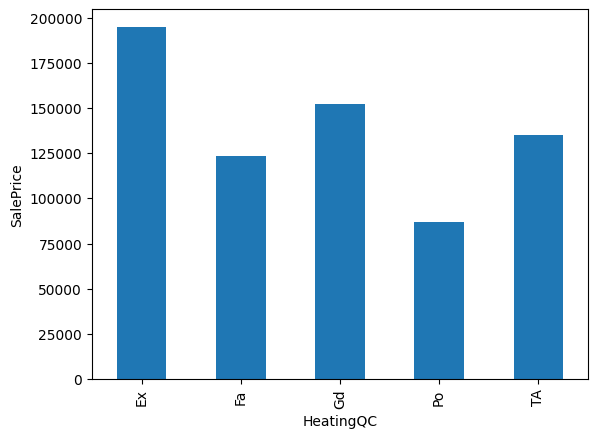

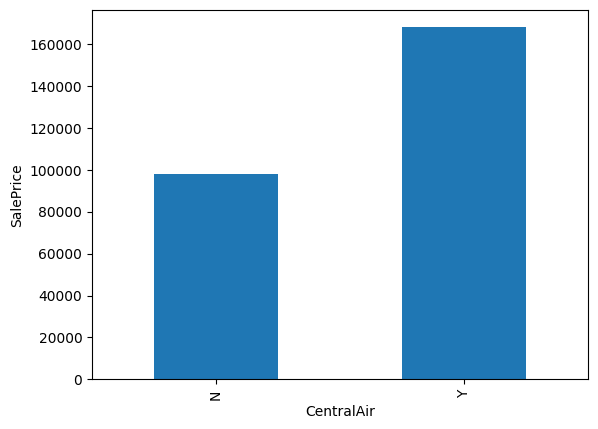

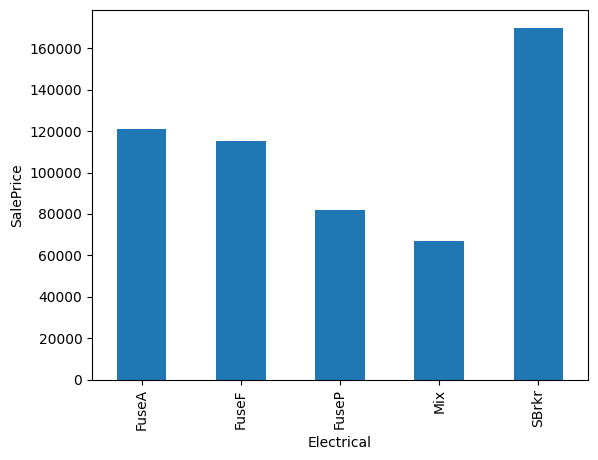

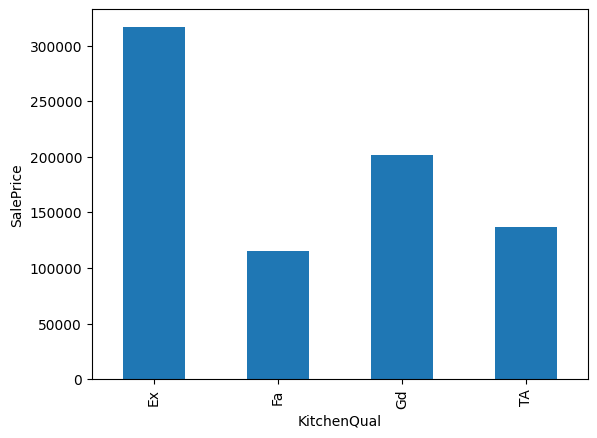

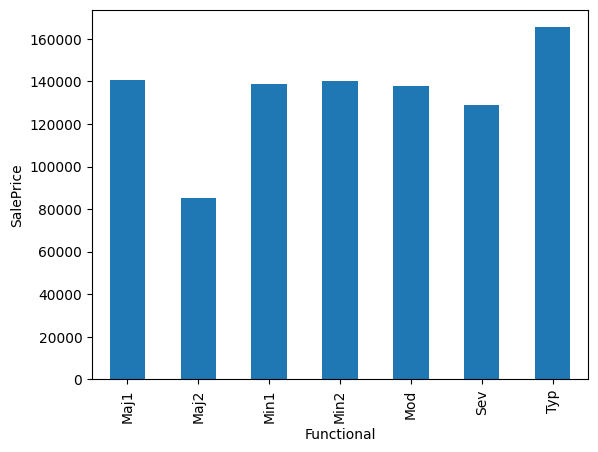

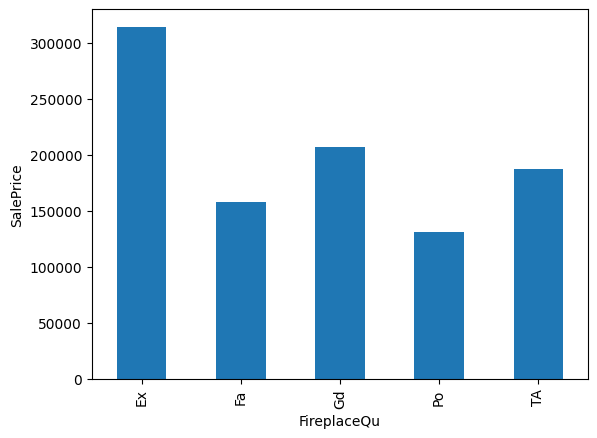

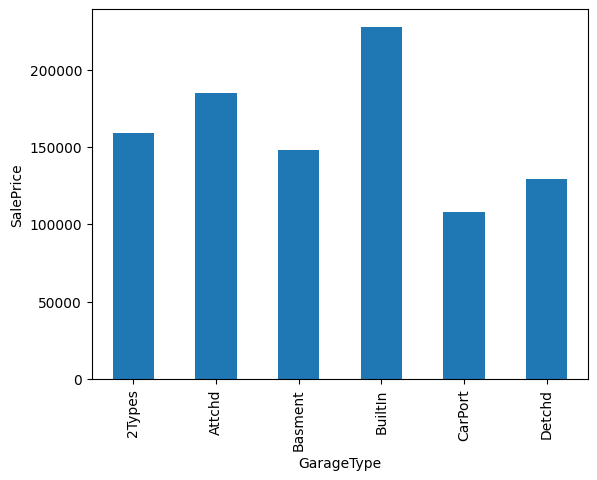

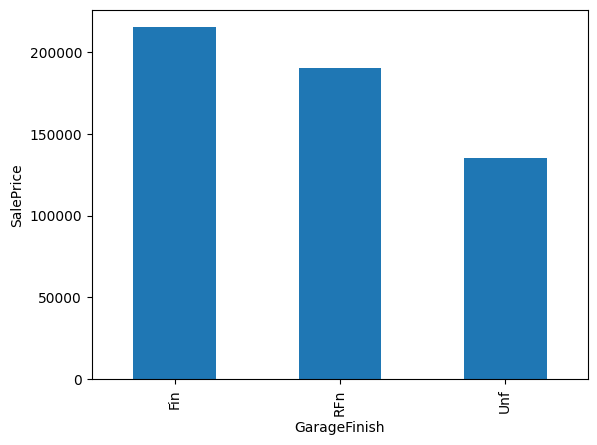

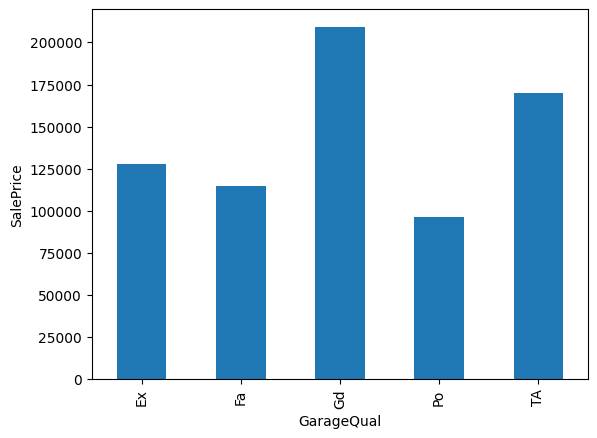

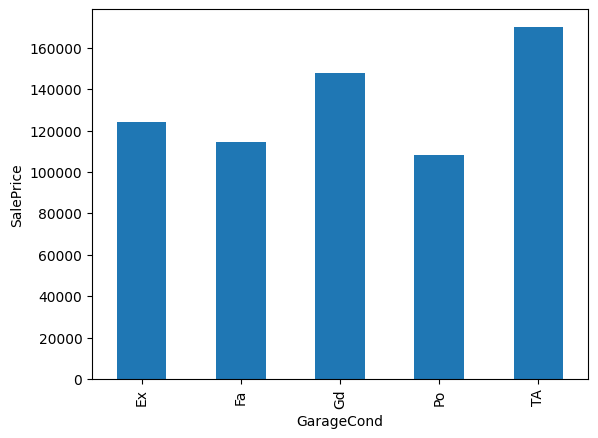

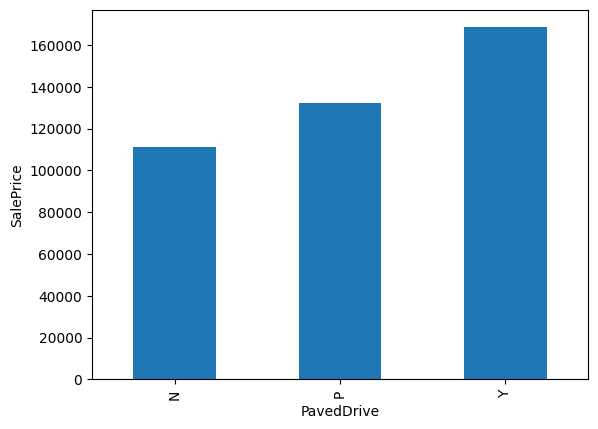

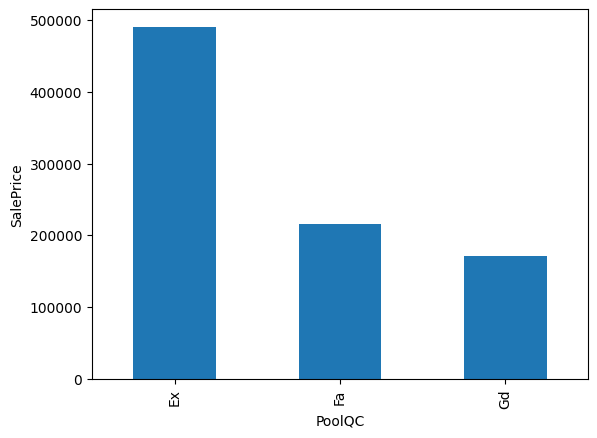

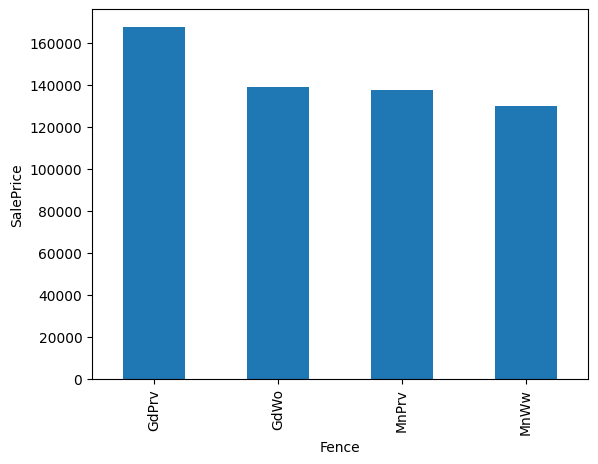

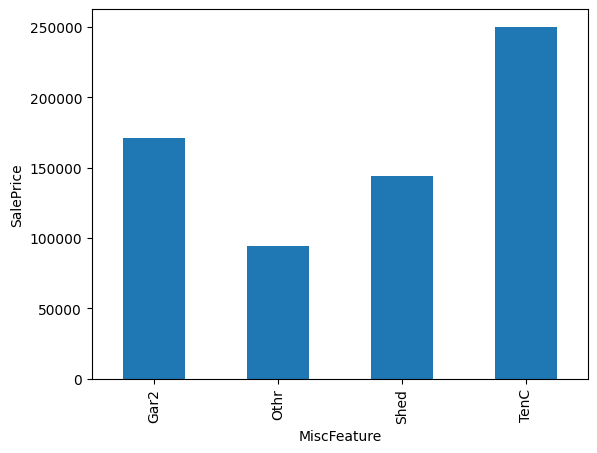

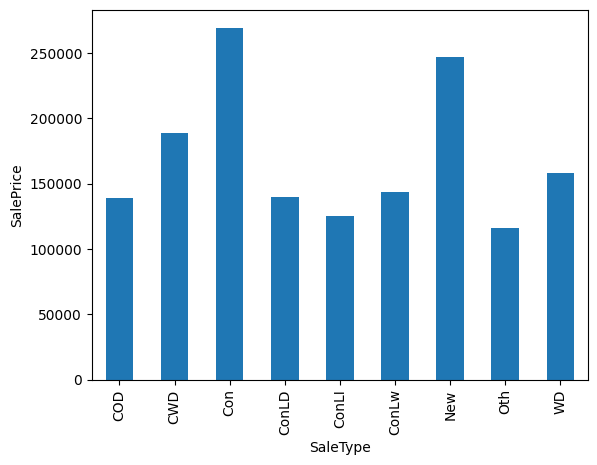

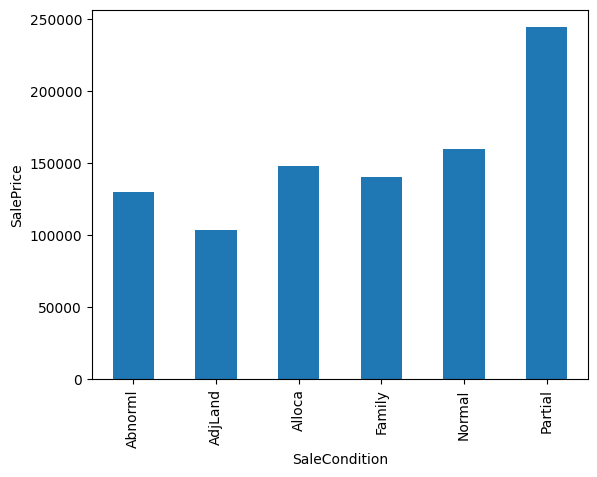

In [9]:
for val in cat_val:
    data.groupby(val)['SalePrice'].median().plot.bar()
    plt.xlabel(val)
    plt.ylabel('SalePrice')
    plt.show()

In [10]:
#null in catagorical values
cat_null_val=[val for val in data.columns if data[val].dtypes=='O' and data[val].isnull().sum()>1]
for val in cat_null_val:
    print('{} has {}% null values'.format(val,np.round(data[val].isnull().mean(),4)))

Alley has 0.9377% null values
MasVnrType has 0.5973% null values
BsmtQual has 0.0253% null values
BsmtCond has 0.0253% null values
BsmtExposure has 0.026% null values
BsmtFinType1 has 0.0253% null values
BsmtFinType2 has 0.026% null values
FireplaceQu has 0.4726% null values
GarageType has 0.0555% null values
GarageFinish has 0.0555% null values
GarageQual has 0.0555% null values
GarageCond has 0.0555% null values
PoolQC has 0.9952% null values
Fence has 0.8075% null values
MiscFeature has 0.963% null values


In [11]:
#finding the temporal values (Data time values)  __. these change over time
temp_val=[val for val in data.columns if 'Year' in val or 'Yr' in val]
print(temp_val)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [12]:
#exploring the contents of temp_values
for val in temp_val:
    print(val,data[val].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

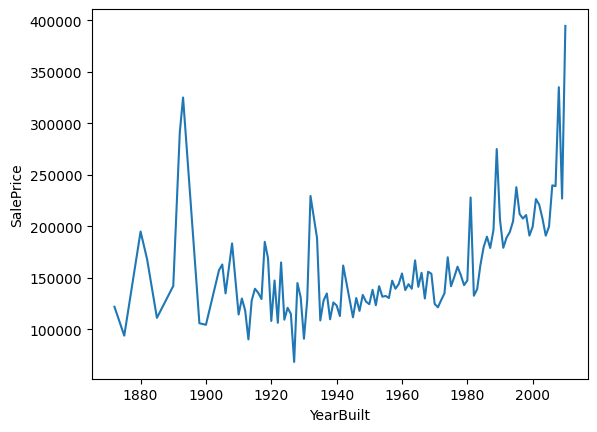

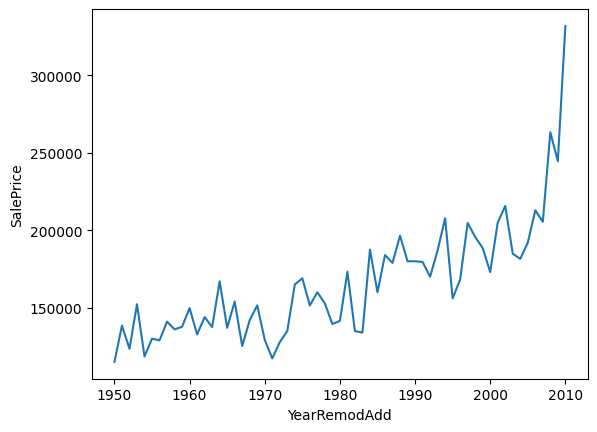

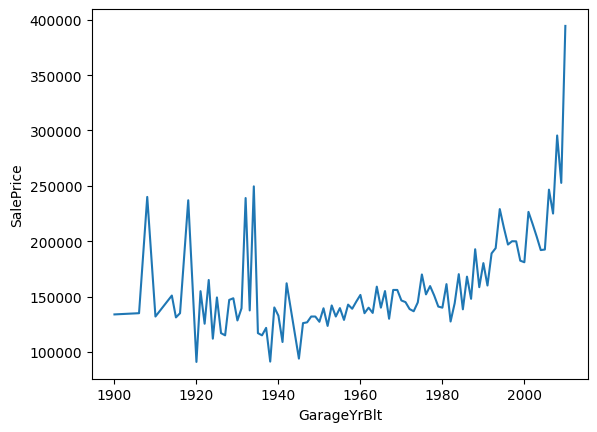

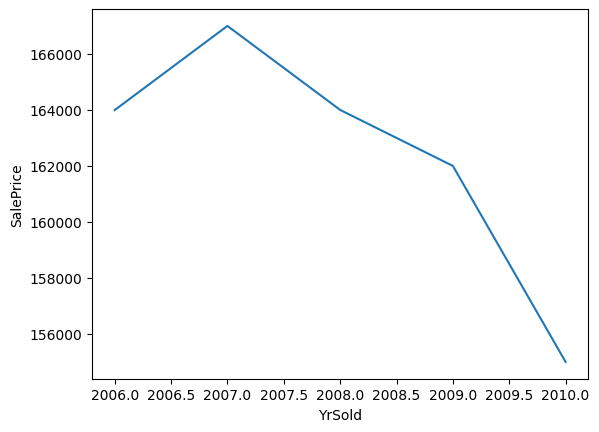

In [13]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price
for val in temp_val:
    data.groupby(val)['SalePrice'].median().plot()
    plt.xlabel(val)
    plt.ylabel('SalePrice')
    plt.show()

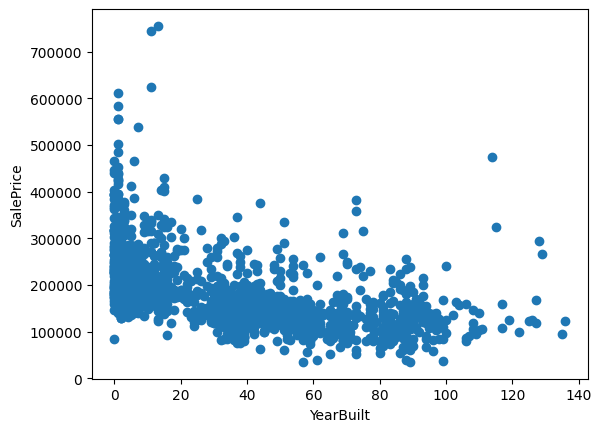

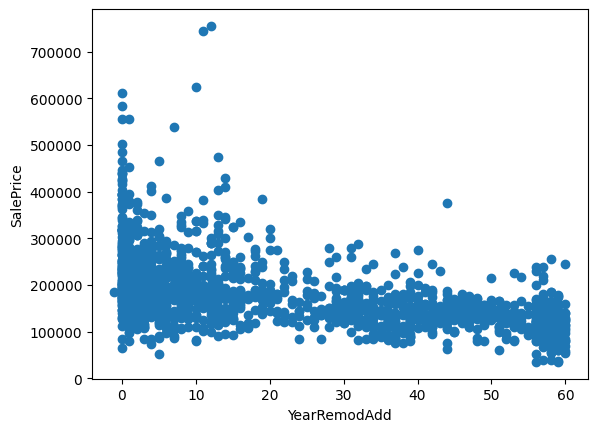

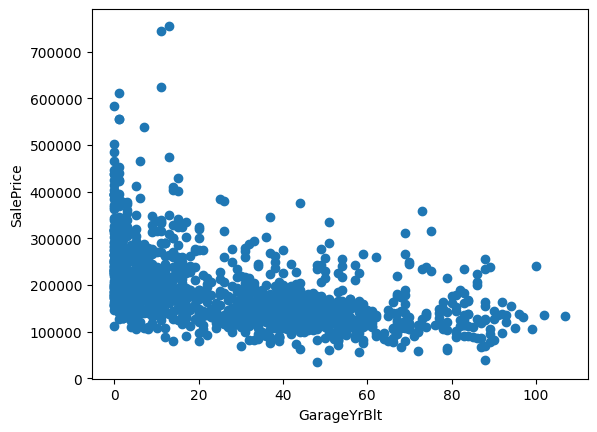

In [14]:
 ## Here we will compare the difference between All years feature with SalePrice

for val in temp_val:
    if val!='YrSold':
        dataset=data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        dataset[val]=dataset['YrSold']-dataset[val]

        plt.scatter(dataset[val],dataset['SalePrice'])
        plt.xlabel(val)
        plt.ylabel('SalePrice')
        plt.show()

In [15]:
#finding which are the discrete features:
dis_val=[val for val in num_val if len(data[val].unique()) <25 and val not in temp_val]
print(dis_val)
print("Discrete Variables Count: {}".format(len(dis_val)))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
Discrete Variables Count: 17


In [16]:
data[dis_val].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

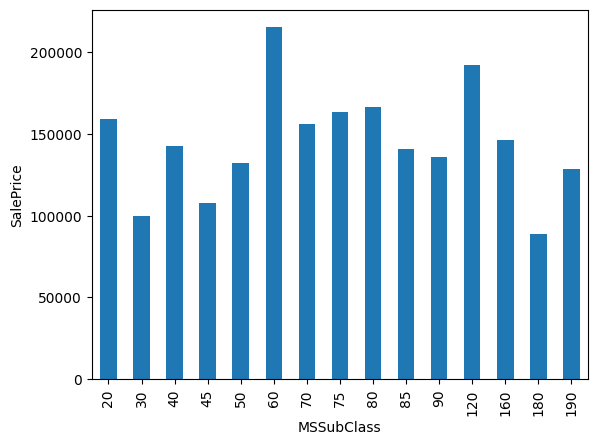

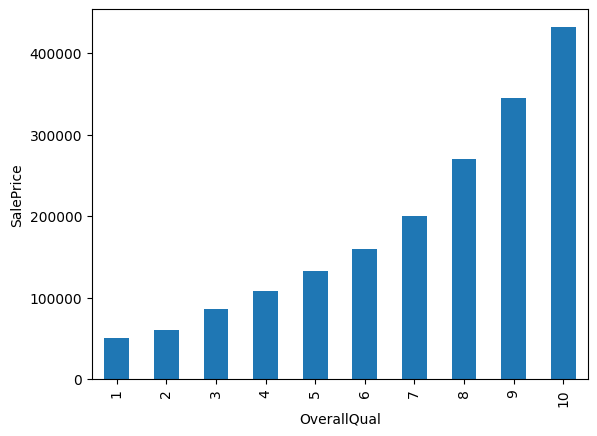

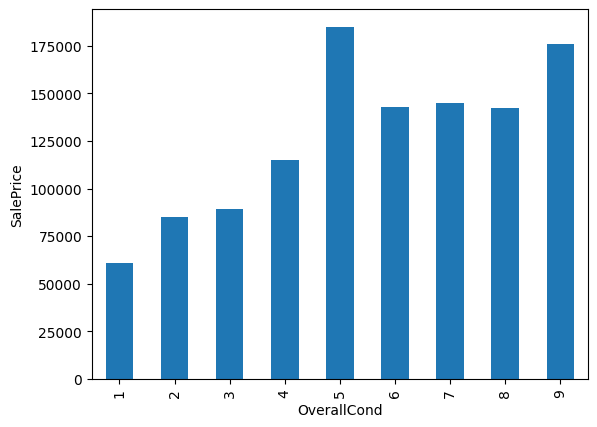

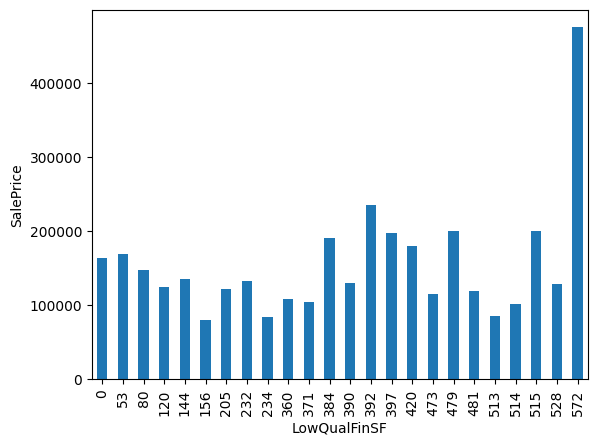

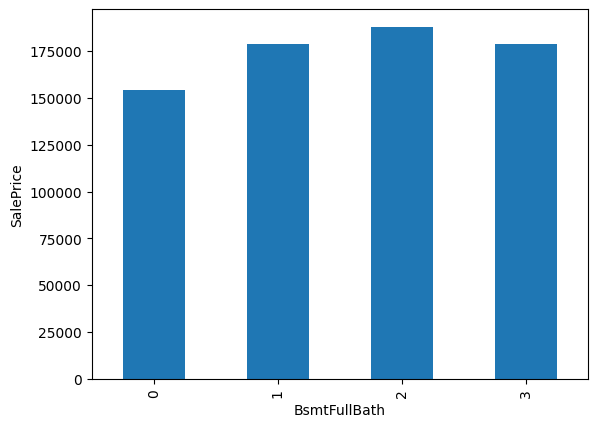

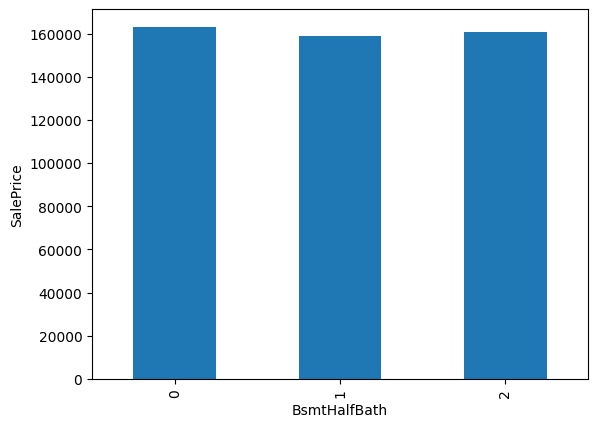

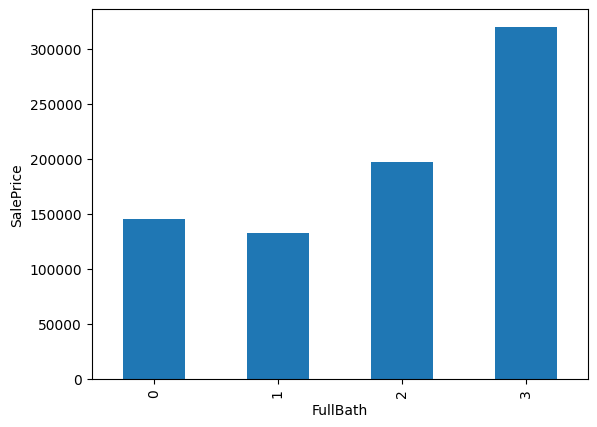

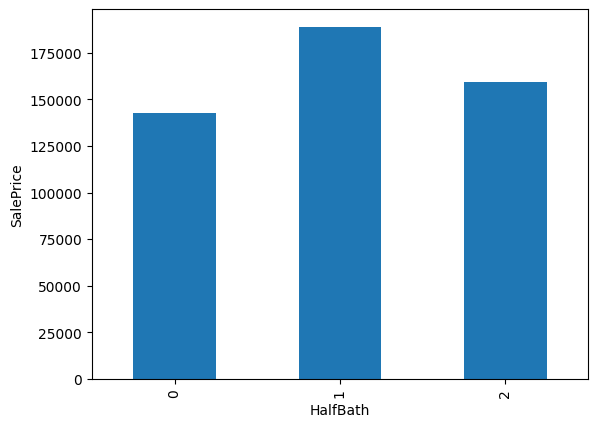

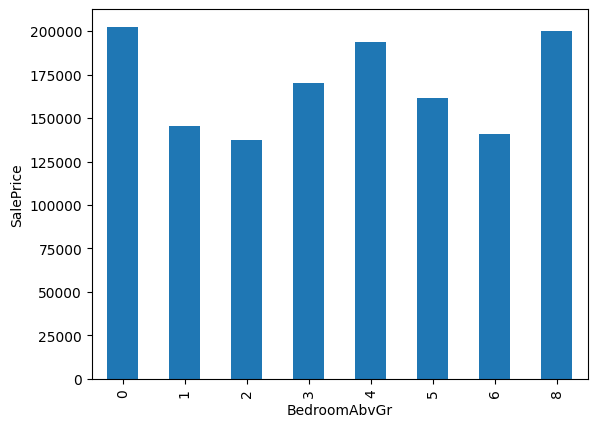

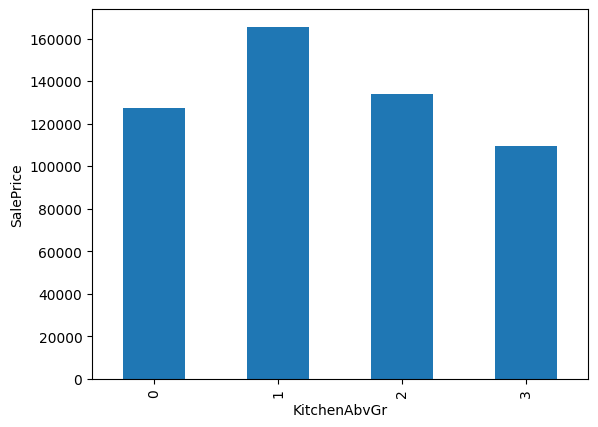

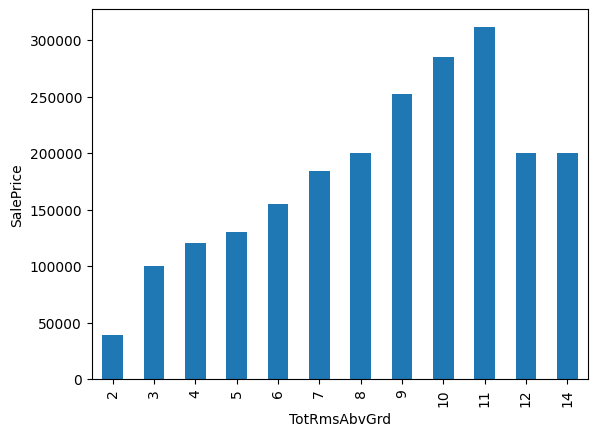

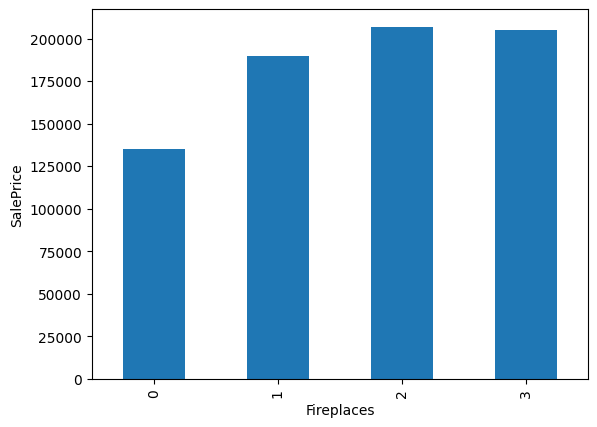

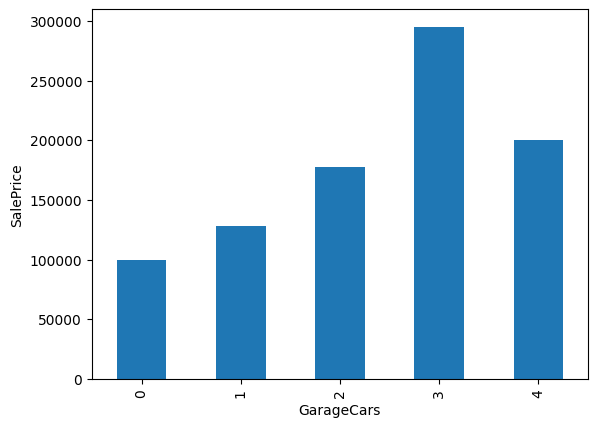

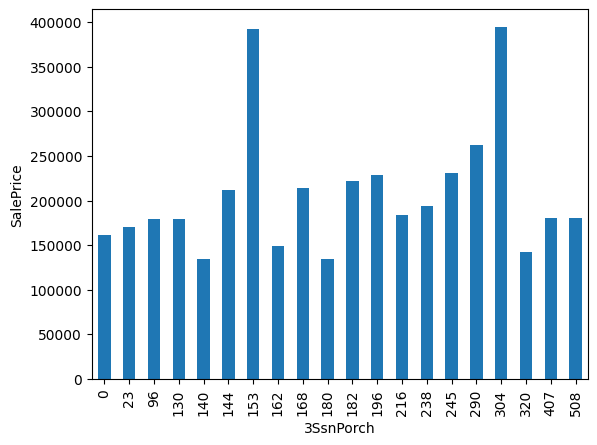

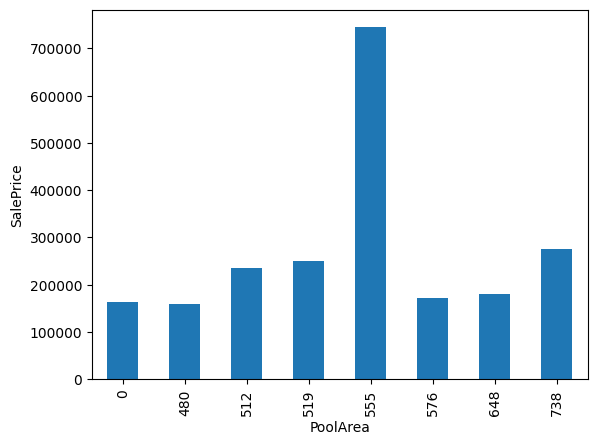

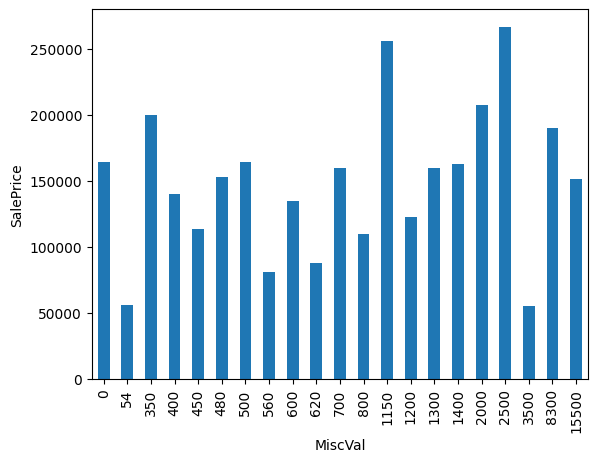

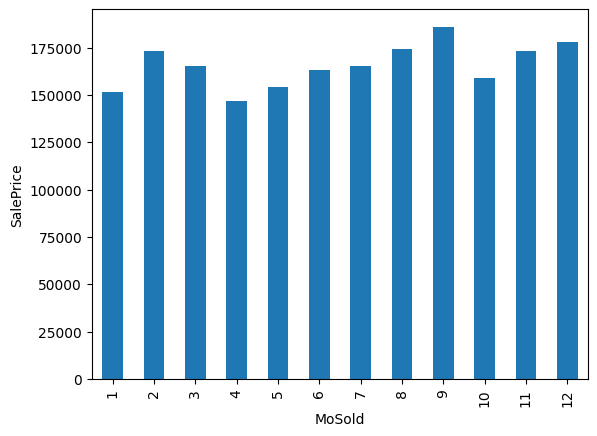

In [17]:
#relationship between SalePrice and discrete variables
for val in dis_val:
    data.groupby(val)['SalePrice'].median().plot.bar()
    plt.xlabel(val)
    plt.ylabel('SalePrice')
    plt.show()

In [18]:
#finding out the contineous variables
cont_val=[val for val in num_val if val not in dis_val+temp_val]
print(cont_val)
print("Continuous feature Count {}".format(len(cont_val)))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Continuous feature Count 16


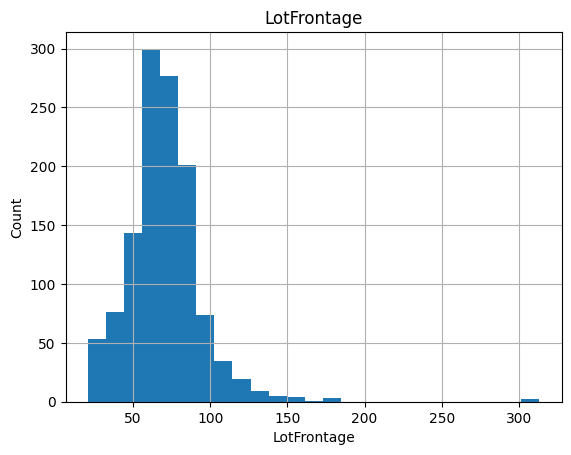

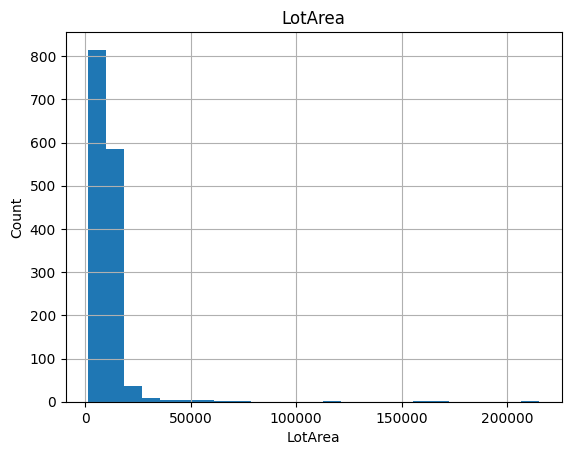

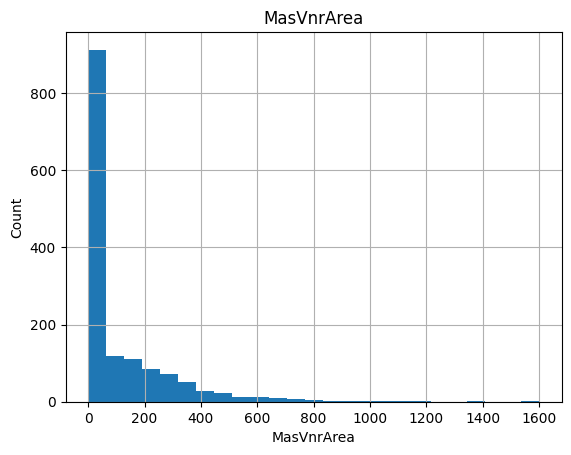

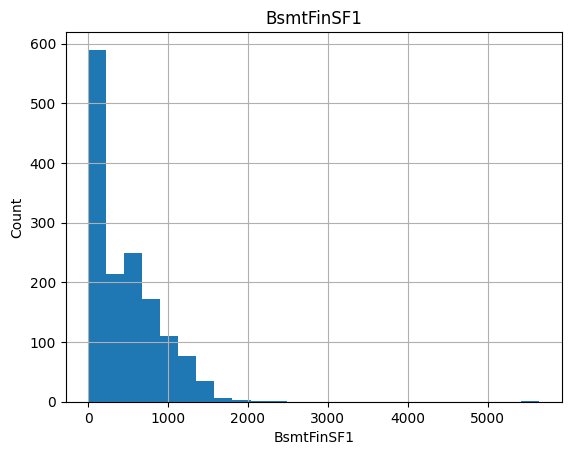

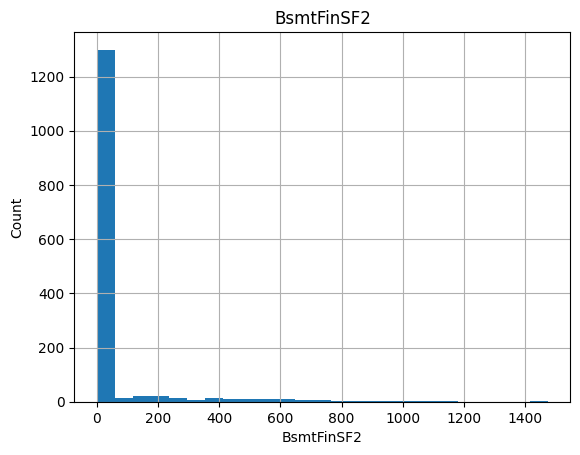

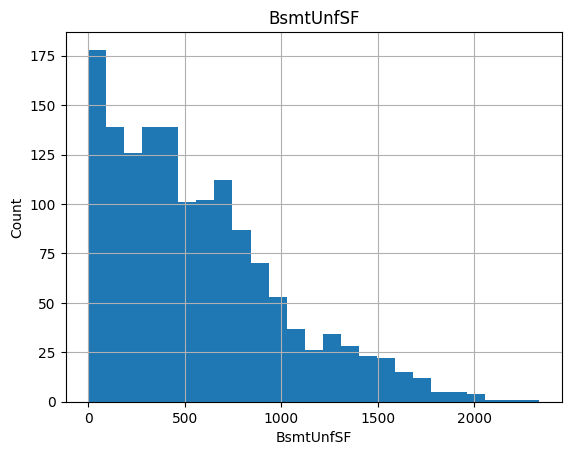

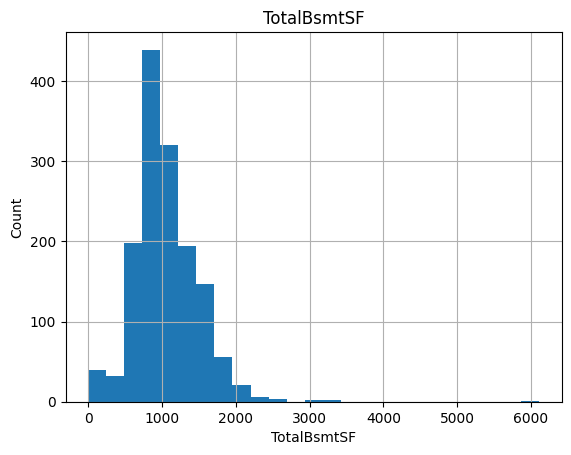

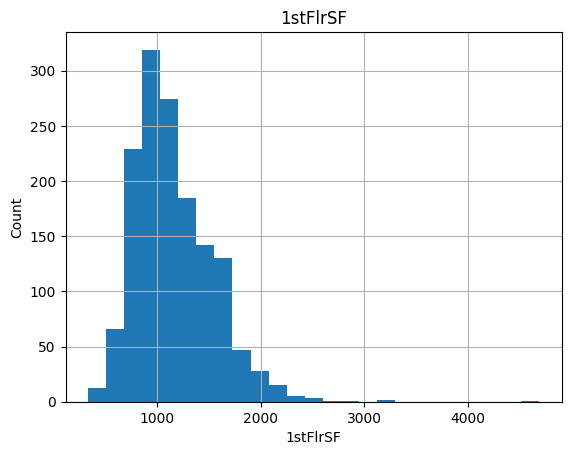

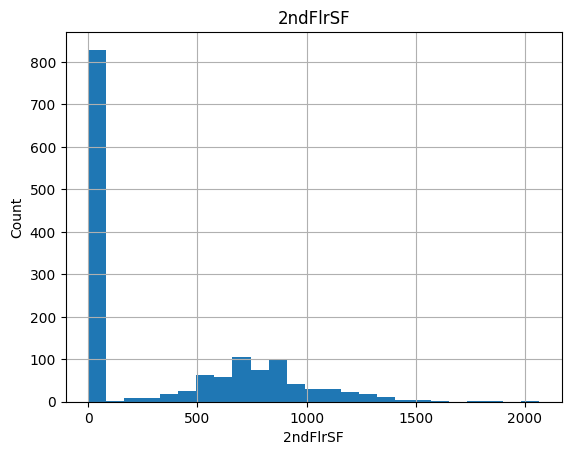

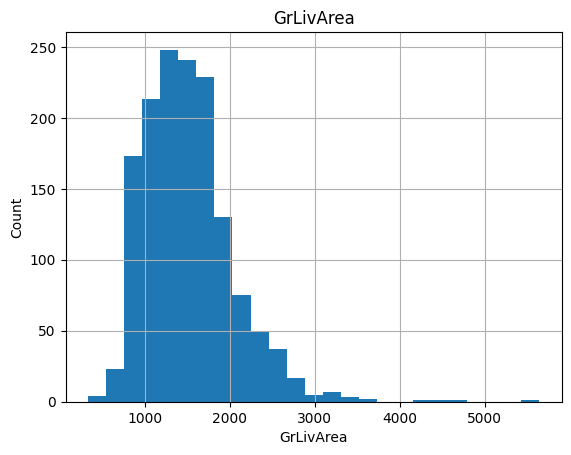

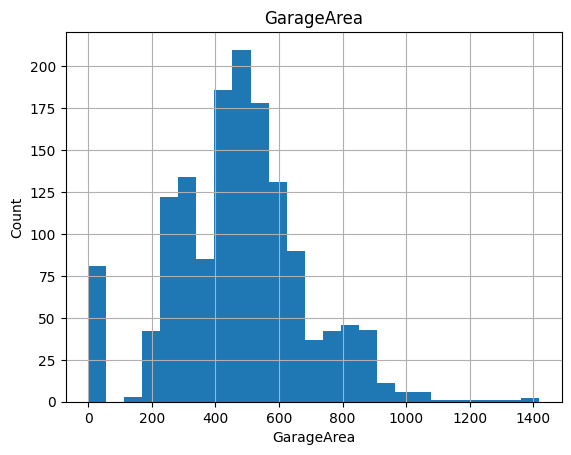

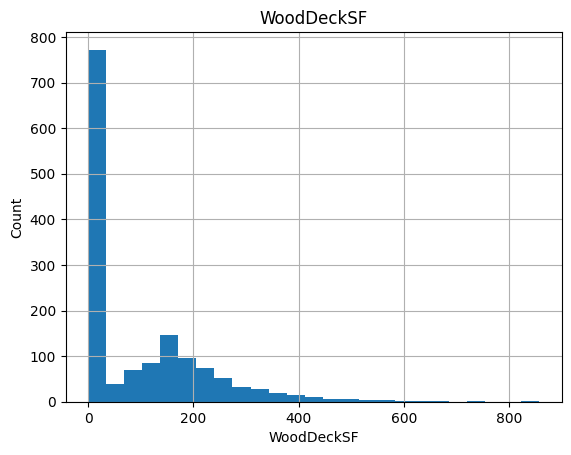

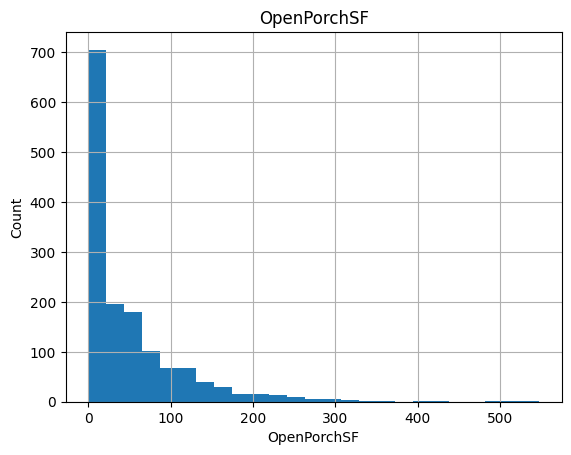

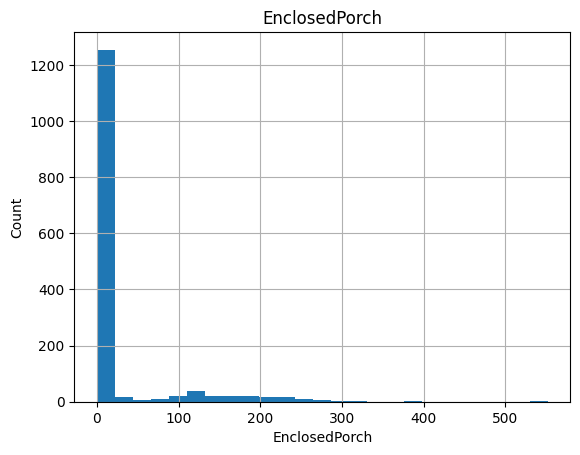

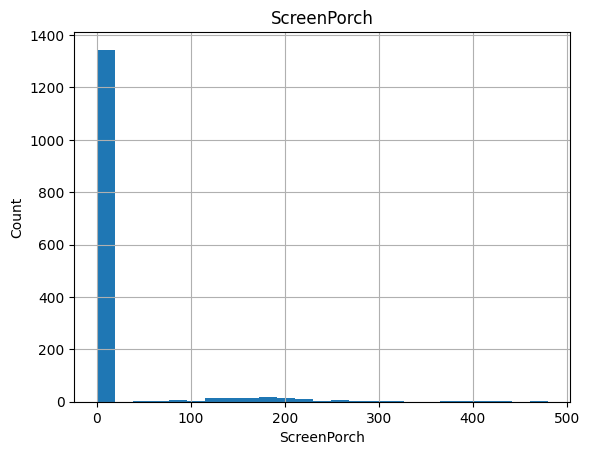

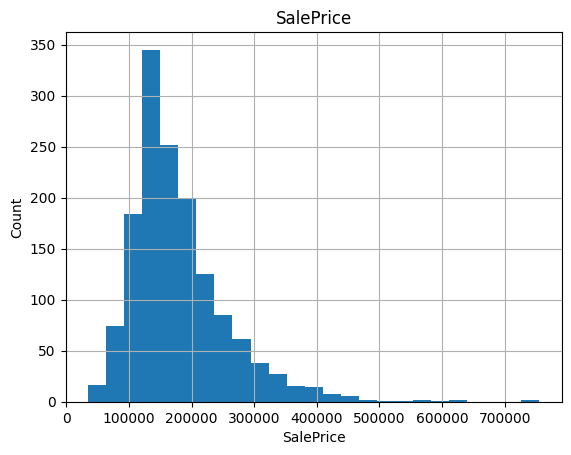

In [19]:
for val in cont_val:
    dataset=data.copy()
    data[val].hist(bins=25)
    plt.xlabel(val)
    plt.ylabel("Count")
    plt.title(val)
    plt.show()

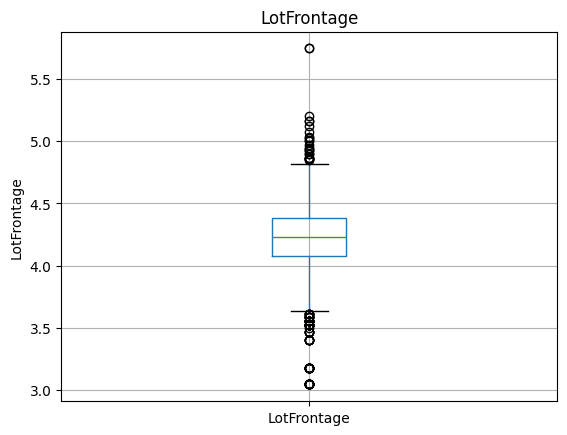

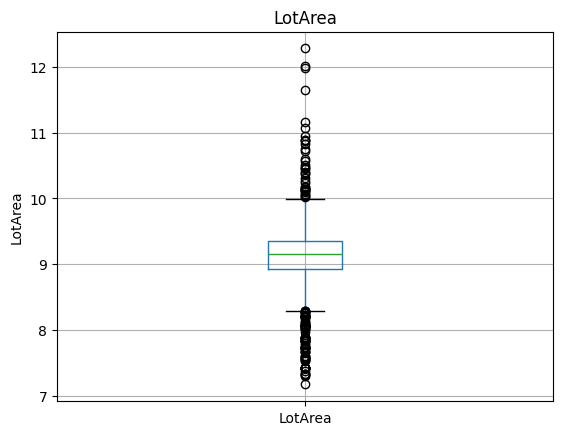

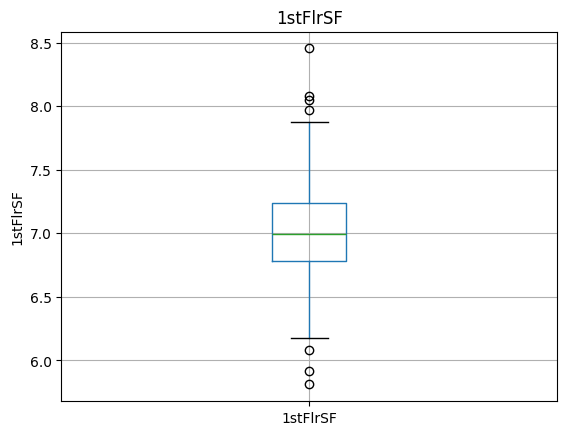

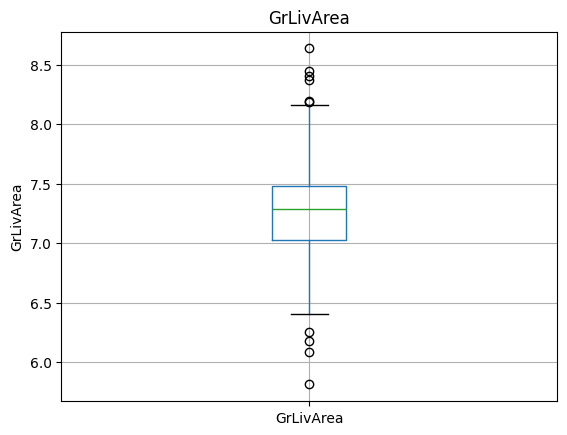

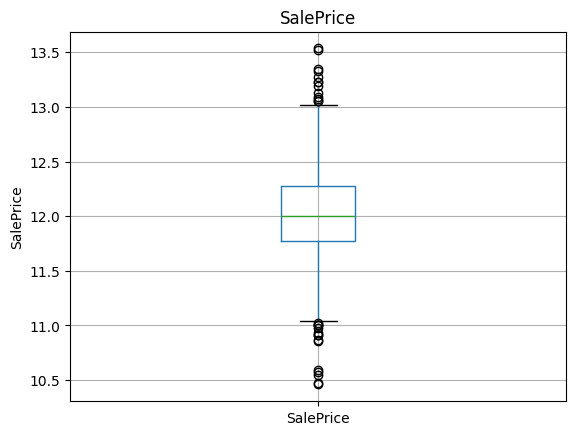

In [20]:
#finding the outliers
for val in cont_val:
    dataset=data.copy()
    if 0 in dataset[val].unique():
        pass
    else:
        dataset[val]=np.log(dataset[val])
        dataset.boxplot(column=val)
        plt.ylabel(val)
        plt.title(val)
        plt.show()

In [22]:
## Replacing the numerical Missing Values

for val in num_null_val:
    ## We will replace by using median since there are outliers
    median_value=data[val].median()
    
    ## create a new feature to capture nan values
    data[val+'nan']=np.where(data[val].isnull(),1,0)
    data[val].fillna(median_value,inplace=True)
    
data[num_null_val].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [23]:
data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL         69.0    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL         69.0    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL         69.0    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL         69.0    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL         69.0     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL         69.0     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL         69.0     9180   Pave   NaN      IR1   
43  44          20       RL         69.0     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2

In [24]:
for val in cat_val:
    data[val].fillna('Missing',inplace=True)
data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   
20  21          60       RL        101.0    14215   Pave  Missing      IR1   
21  22          45       RM         57.0     7449   Pave     Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Missing      Reg   
23  24         120       RM         44.0     4224   Pave  Missing      Reg   
24  25          20       RL         69.0     8246   Pave  Missing      IR1   
25  26          20       RL        110.0    14230   Pave  Missing      Reg   
26  27          20       RL         60.0     7200   Pave  Missing      Reg   
27  28          20       RL         98.0    11478   Pave  Missing      Reg   
28  29          20       RL         47.0    16321   Pave  Missing      IR1   
29  30          30       RM         60.0     6324   Pave  Missing      IR1   
30  31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Missing      IR1   
32  33          20       RL         85.0    11049   Pave  Missing      Reg   
33  34          20       RL         70.0    10552   Pave  Missing      IR1   
34  35         120       RL         60.0     7313   Pave  Missing      Reg   
35  36          60       RL        108.0    13418   Pave  Missing      Reg   
36  37          20       RL        112.0    10859   Pave  Missing      Reg   
37  38          20       RL         74.0     8532   Pave  Missing      Reg   
38  39          20       RL         68.0     7922   Pave  Missing      Reg   
39  40          90       RL         65.0     6040   Pave  Missing      Reg   
40  41          20       RL         84.0     8658   Pave  Missing      Reg   
41  42          20       RL        115.0    16905   Pave  Missing      Reg   
42  43          85       RL         69.0     9180   Pave  Missing      IR1   
43  44          20       RL         69.0     9200   Pave  Missing      IR1   
44  45          20       RL         70.0     7945   Pave  Missing      Reg   
45  46         120       RL         61.0     7658   Pave  Missing      Reg   
46  47          50       RL         48.0    12822   Pave  Missing      IR1   
47  48          20       FV         84.0    11096   Pave  Missing      Reg   
48  49         190       RM         33.0     4456   Pave  Missing      Reg   
49  50          20       RL         66.0     7742   Pave  Missing      Reg   

   LandContour Utilities 

In [25]:
## Temporal Variables (Date Time Variables)

for val in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    data[val]=data['YrSold']-data[val]

In [26]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [27]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0       2003          2003       2003.0
1       1976          1976       1976.0
2       2001          2002       2001.0
3       1915          1970       1998.0
4       2000          2000       2000.0

In [28]:
#converting the values into gaussian values for training and testing
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for val in num_features:
    data[val]=np.log(data[val])

In [29]:
data.head(50)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1    2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2    3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3    4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4    5          60       RL     4.430817  9.565214   Pave  Missing      IR1   
5    6          50       RL     4.442651  9.554993   Pave  Missing      IR1   
6    7          20       RL     4.317488  9.218705   Pave  Missing      Reg   
7    8          60       RL     4.234107  9.247829   Pave  Missing      IR1   
8    9          50       RM     3.931826  8.719317   Pave  Missing      Reg   
9   10         190       RL     3.912023  8.911934   Pave  Missing      Reg   
10  11          20       RL     4.248495  9.323669   Pave  Missing      Reg   
11  12          60       RL     4.442651  9.386308   Pave  Missing      IR1   
12  13          20       RL     4.234107  9.470240   Pave  Missing      IR2   
13  14          20       RL     4.510860  9.273503   Pave  Missing      IR1   
14  15          20       RL     4.234107  9.298351   Pave  Missing      IR1   
15  16          45       RM     3.931826  8.719317   Pave  Missing      Reg   
16  17          20       RL     4.234107  9.327323   Pave  Missing      IR1   
17  18          90       RL     4.276666  9.286468   Pave  Missing      Reg   
18  19          20       RL     4.189655  9.524786   Pave  Missing      Reg   
19  20          20       RL     4.248495  8.930626   Pave  Missing      Reg   
20  21          60       RL     4.615121  9.562053   Pave  Missing      IR1   
21  22          45       RM     4.043051  8.915835   Pave     Grvl      Reg   
22  23          20       RL     4.317488  9.184202   Pave  Missing      Reg   
23  24         120       RM     3.784190  8.348538   Pave  Missing      Reg   
24  25          20       RL     4.234107  9.017484   Pave  Missing      IR1   
25  26          20       RL     4.700480  9.563108   Pave  Missing      Reg   
26  27          20       RL     4.094345  8.881836   Pave  Missing      Reg   
27  28          20       RL     4.584967  9.348187   Pave  Missing      Reg   
28  29          20       RL     3.850148  9.700208   Pave  Missing      IR1   
29  30          30       RM     4.094345  8.752107   Pave  Missing      IR1   
30  31          70  C (all)     3.912023  9.047821   Pave     Pave      Reg   
31  32          20       RL     4.234107  9.052985   Pave  Missing      IR1   
32  33          20       RL     4.442651  9.310095   Pave  Missing      Reg   
33  34          20       RL     4.248495  9.264071   Pave  Missing      IR1   
34  35         120       RL     4.094345  8.897409   Pave  Missing      Reg   
35  36          60       RL     4.682131  9.504352   Pave  Missing      Reg   
36  37          20       RL     4.718499  9.292750   Pave  Missing      Reg   
37  38          20       RL     4.304065  9.051579   Pave  Missing      Reg   
38  39          20       RL     4.219508  8.977399   Pave  Missing      Reg   
39  40          90       RL     4.174387  8.706159   Pave  Missing      Reg   
40  41          20       RL     4.430817  9.066239   Pave  Missing      Reg   
41  42          20       RL     4.744932  9.735365   Pave  Missing      Reg   
42  43          85       RL     4.234107  9.124782   Pave  Missing      IR1   
43  44          20       RL     4.234107  9.126959   Pave  Missing      IR1   
44  45          20       RL     4.248495  8.980298   Pave  Missing      Reg   
45  46         120       RL     4.110874  8.943506   Pave  Missing      Reg   
46  47          50       RL     3.871201  9.458918   Pave  Missing      IR1   
47  48          20       FV     4.430817  9.314340   Pave  Missing      Reg   
48  49         190       RM     3.496508  8.402007   Pave  Missing      Reg   
49  50          20       RL     4.189655  8.954415   P

In [30]:
#finding the rare catogorical values
for val in cat_val:
    temp=data.groupby(val)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[val]=np.where(data[val].isin(temp_df),data[val],'Rare_var')

In [31]:
data.head(100)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0     1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1     2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2     3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3     4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4     5          60       RL     4.430817  9.565214   Pave  Missing      IR1   
..  ...         ...      ...          ...       ...    ...      ...      ...   
95   96          60       RL     4.234107  9.186560   Pave  Missing      IR2   
96   97          20       RL     4.356709  9.236398   Pave  Missing      IR1   
97   98          20       RL     4.290459  9.298443   Pave  Missing      Reg   
98   99          30       RL     4.442651  9.270965   Pave  Missing      Reg   
99  100          20       RL     4.343805  9.139918   Pave  Missing      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl     Rare_var      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97         HLS    AllPub    Inside       Gtl      Edwards       Norm   
98         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8         16   
96       Norm     1Fam     1Story            7            5          7   
97       Norm     1Fam     1Story            4            5         42   
98       Norm     1Fam     1Story            5            5         90   
99       Norm     1Fam     1Story            4            5         51   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             31     Gable  CompShg     MetalSd     MetalSd    Missing   
2              6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4              8     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95            16     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96             7     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97            42       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98            60     Gable  CompShg     Wd Sdng     Wd Sdng    Missing   
99            51     Gable  CompShg     Plywood     Plywood    Missing   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd       TA           No   
1          0.0        TA        TA     CBlock       Gd       TA           Gd   
2        162.0        Gd        TA      PConc       Gd       TA           Mn   
3          0.0        TA        TA     BrkTil       TA       Gd           No   
4

In [32]:
#replacing catagorical values with labels
for val in cat_val:
    labels_ordered=data.groupby([val])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[val]=data[val].map(labels_ordered)

In [33]:
data.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   
5   6          50         3     4.442651  9.554993       1      2         1   
6   7          20         3     4.317488  9.218705       1      2         0   
7   8          60         3     4.234107  9.247829       1      2         1   
8   9          50         1     3.931826  8.719317       1      2         0   
9  10         190         3     3.912023  8.911934       1      2         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   
5            1          1          0          0             9           2   
6            1          1          0          0            18           2   
7            1          1          1          0            12           5   
8            1          1          0          0             4           0   
9            1          1          1          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   
5           1         3           1            5            5         16   
6           1         3           3            8            5          3   
7           1         3           5            7            6         36   
8           1         3           1            7            5         77   
9           0         0           2            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   
5            14          0         0           10           10           1   
6             2          0         0           10           10           3   
7            36          0         0            6            5           3   
8            58          0         0            8            4           1   
9            58          0         0            4            3           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   
5         0.0          1          3           3         3         3   
6       186.0          2          3           4         4         3   
7       240.0        

In [36]:
scaling_feature=[val for val in data.columns if val not in ['Id','SalePerice'] ]
print(len(scaling_feature))
print(scaling_feature)

83
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', '

In [37]:
#feature scaling

feature_scale=[val for val in data.columns if val not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [39]:
scaler.transform(data[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
# transform the train and test set, and add on the Id and SalePrice variables
data_fin = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [41]:
data_fin.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    0.666667     0.12250   0.666667        1.0        1.00      0.75   
1    0.333333     0.00000   0.333333        1.0        0.50      0.75   
2    0.666667     0.10125   0.666667        1.0        1.00      0.75   
3    0.333333     0.00000   0.333333        1.0        0.25      0.50   
4    0.666667     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [42]:
data.to_csv('X_train_final.csv',index=False)

In [43]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [44]:
dataset=pd.read_csv('X_train_final.csv')

In [45]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        2          4           1           3   
1        284         1262        2          4           1           3   
2        434          920        2          4           1           3   
3        540          756        2          3           1           3   
4        490         1145        2          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

In [46]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [47]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [48]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [49]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 38
features with coefficients shrank to zero: 42


In [50]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition'],
      dtype='object')

In [52]:
X_train=X_train[selected_feat]
X_train.head()

MSSubClass  MSZoning   LotArea  LotConfig  Neighborhood  HouseStyle  \
0          60         3  9.041922          0            14           5   
1          20         3  9.169518          2            11           3   
2          60         3  9.328123          0            14           5   
3          70         3  9.164296          1            16           5   
4          60         3  9.565214          2            22           5   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  Foundation  \
0            7            5          5             5           10           4   
1            6            8         31            31            4           2   
2            7            5          7             6           10           4   
3            7            5         91            36            2           1   
4            8            5          8             8           10           4   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1         706           0        150          856          4   
1             4         978           0        284         1262          4   
2             2         486           0        434          920          4   
3             1         216           0        540          756          3   
4             3         655           0        490         1145          4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  KitchenQual  TotRmsAbvGrd  \
0  6.752270       854             0             1            2             8   
1  7.140453         0             0             0            1             6   
2  6.824374       866             0             1            2             6   
3  6.867974       756             0             1            2             7   
4  7.043160      1053             0             1            2             9   

   Functional  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           4            1           4          5.0             2           2   
1           4            3           4         31.0             2           2   
2           4            3           4          7.0             2           2   
3           4            4           2          8.0             1           3   
4           4            3           4          8.0             2           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  SaleCondition  
0         0              3  
1         0              3  
2         0              3  
3         0              0  
4         0              3